# Python calculation to be made with the normalized spectra

(Note: because the data are quite big, the full loops will be run Star?)


## 0 Packages and data

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/folsomcp/specpolFlow

Cloning into 'specpolFlow'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 323 (delta 136), reused 259 (delta 85), pack-reused 0
Receiving objects: 100% (323/323), 6.20 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
!git clone https://github.com/folsomcp/LSDpy

Cloning into 'LSDpy'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 44 (delta 23), reused 25 (delta 11), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [ ]:
%cd /content/LSDpy
!ls
import lsdpy
%cd /content

/content/LSDpy
hd219134_19jun16_v_01.spec  LICENSE	 lsdpy.py		     README.md
inlsd.dat		    lsdpFunc.py  mask-4500g40-0.1-trim3.dat
/content


In [ ]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

loading specpolFlow package
importing specpolFlow.iolsd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS/

/content/drive/Shareddrives/BeStarsMiMeS


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd

In [ ]:
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')

worksheet = spreadsheet.worksheet("Stars")
rows  = worksheet.get_all_records()

StarData = pd.DataFrame.from_records(rows)  

worksheet = spreadsheet.worksheet("Observations")
rows  = worksheet.get_all_records()

Observations = pd.DataFrame.from_records(rows)

In [ ]:
import itertools

### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")


## 1. Verifying the listed vsini

### 1.1 Demo with a single observation

In [ ]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = 'NormalizedSpectra/{}_1.s'.format(star)
data = pol.iolsd.read_spectrum(file)

print(data.wl)

[ 369.683   369.6853  369.6876 ... 1048.0935 1048.0988 1048.1039]


Text(0.5, 1.0, 'hd6226 observation 1')

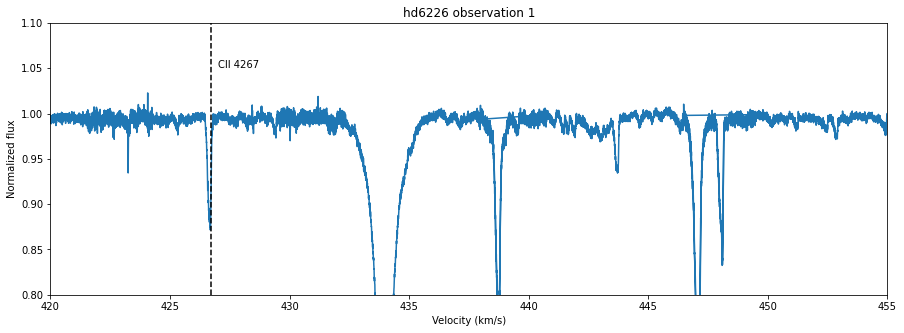

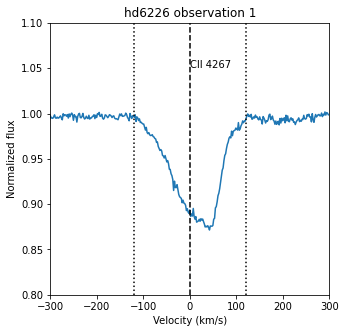

In [ ]:
CII = 426.726 *u.nm

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI)
ax.set_xlim(420,455)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

fig, ax = plt.subplots(1,1, figsize=(5,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, data.specI)
ax.set_xlim(-300,300)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=0, c='k', ls='--')
ax.axvline(x=vsini, c='k', ls='dotted')
ax.axvline(x=-1*vsini, c='k', ls='dotted')
ax.text(0, 1.05, 'CII 4267')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))


### 1.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. **Only use the first observation for each star.** 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

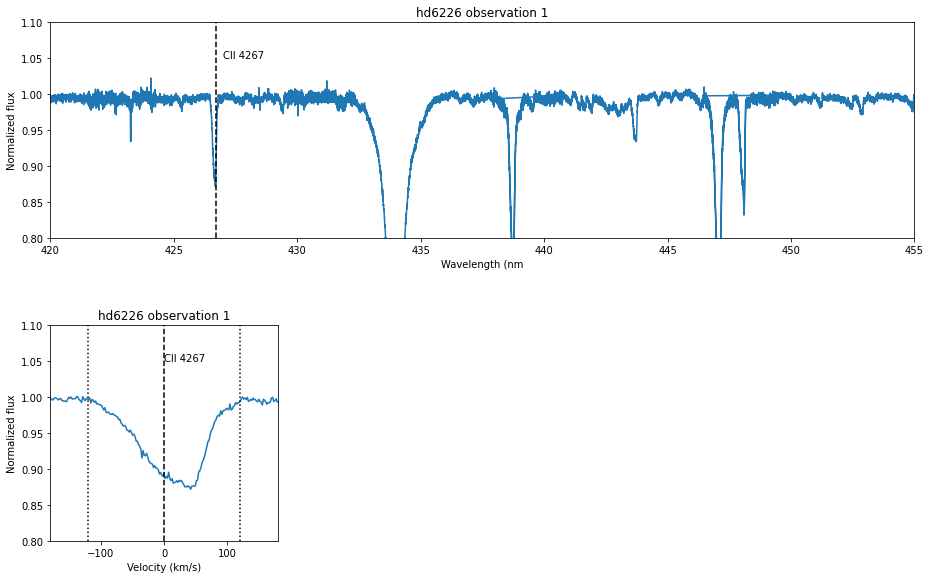

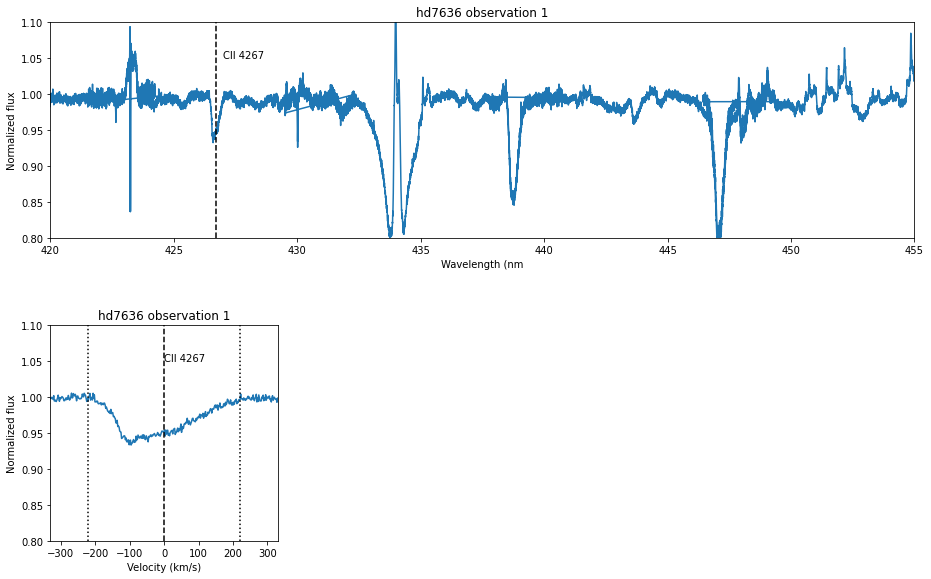

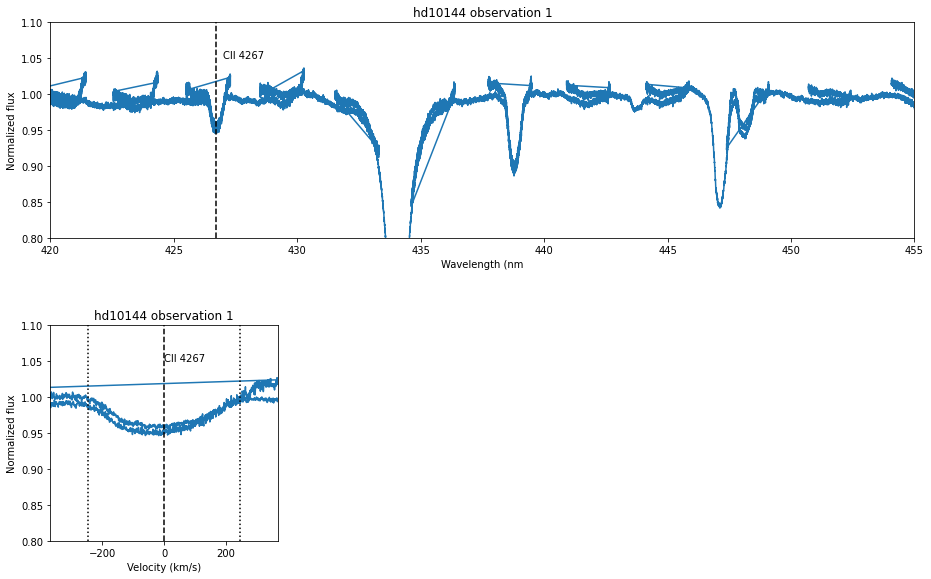

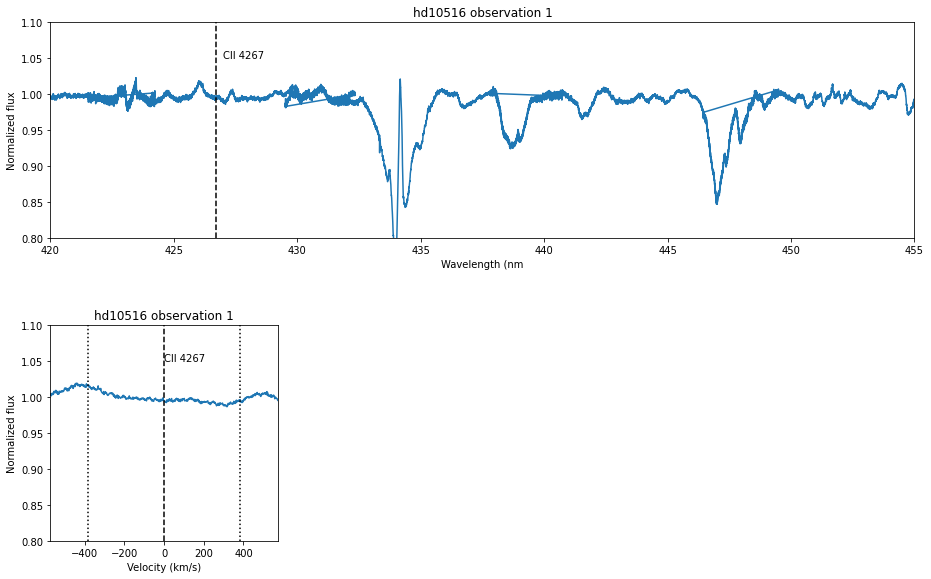

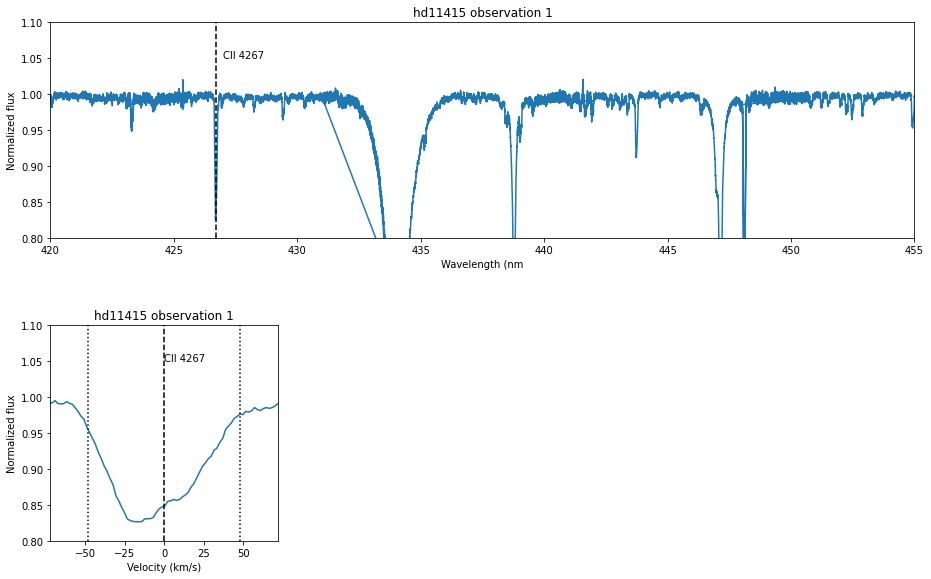

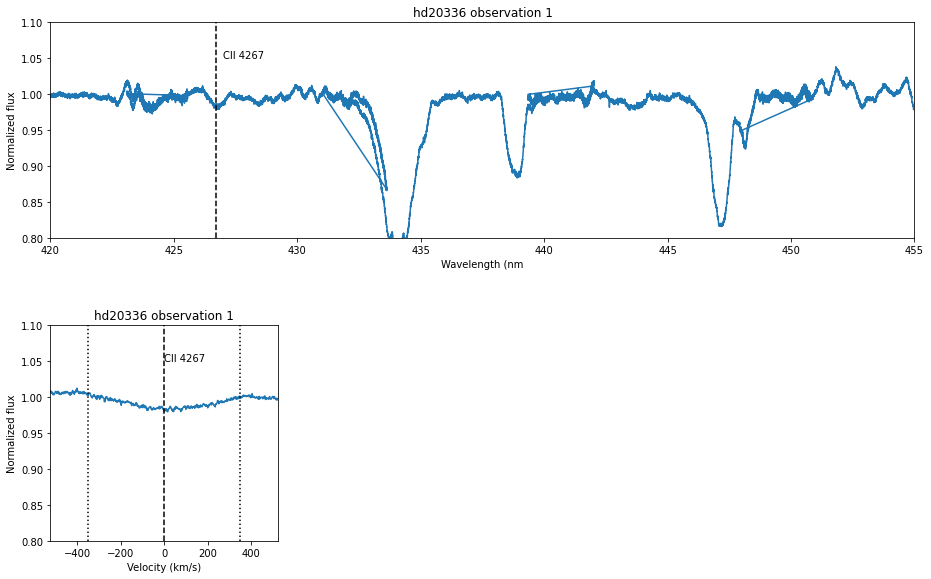

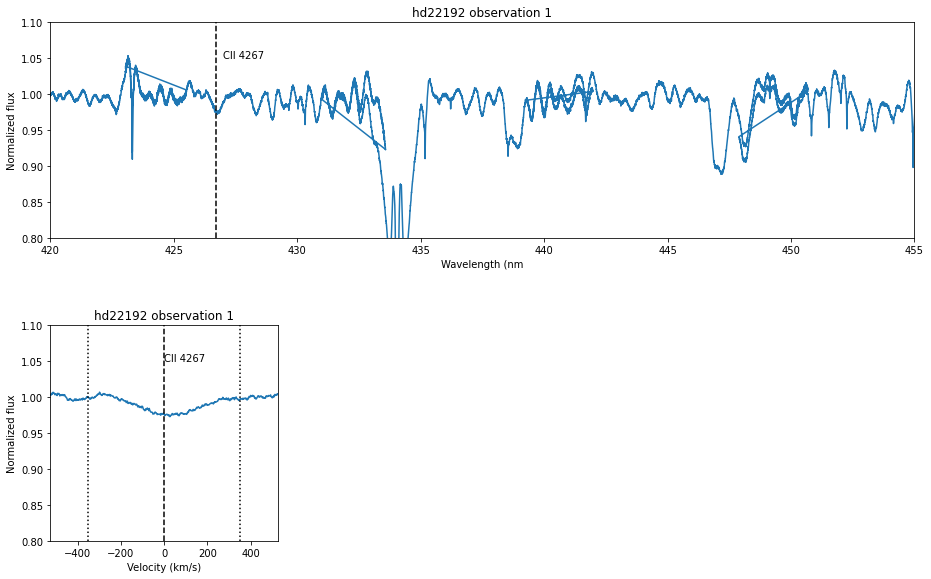

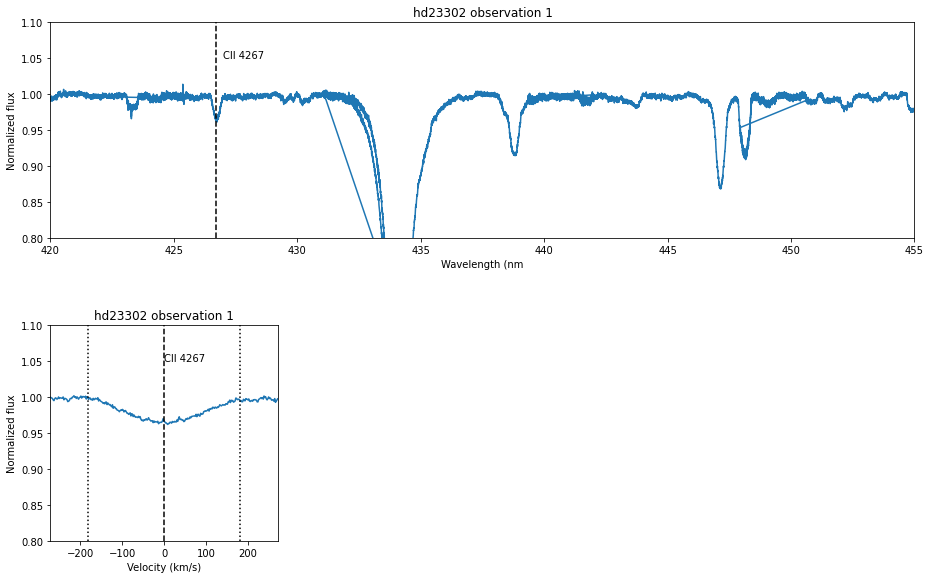

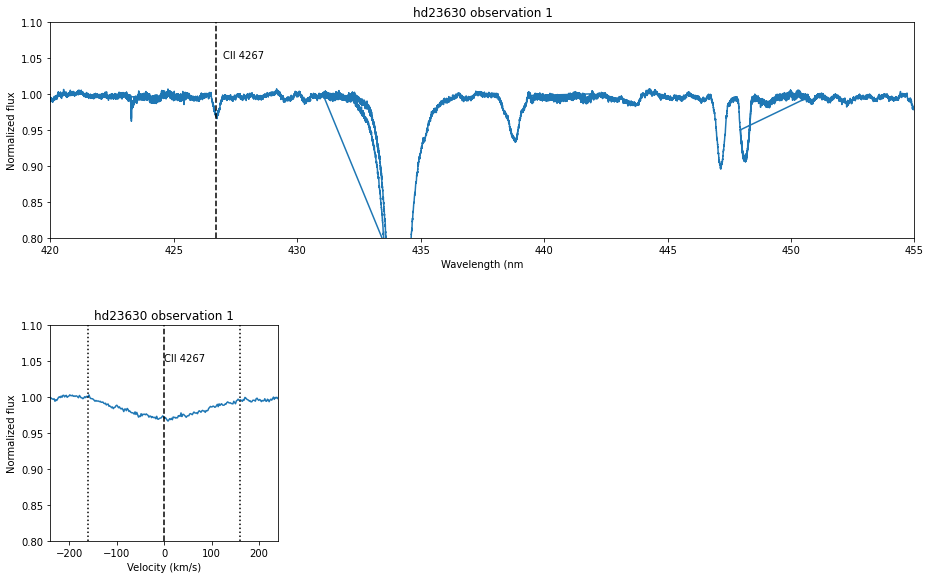

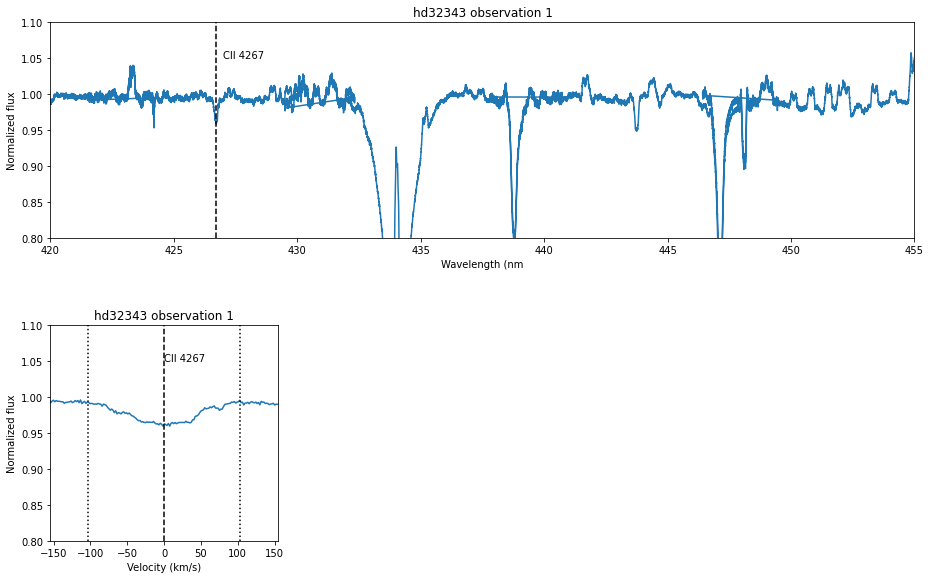

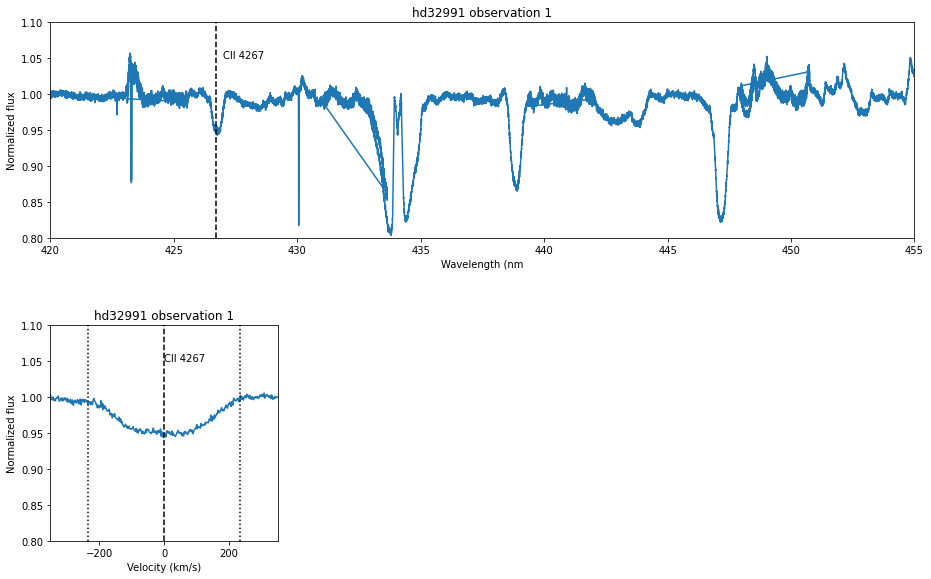

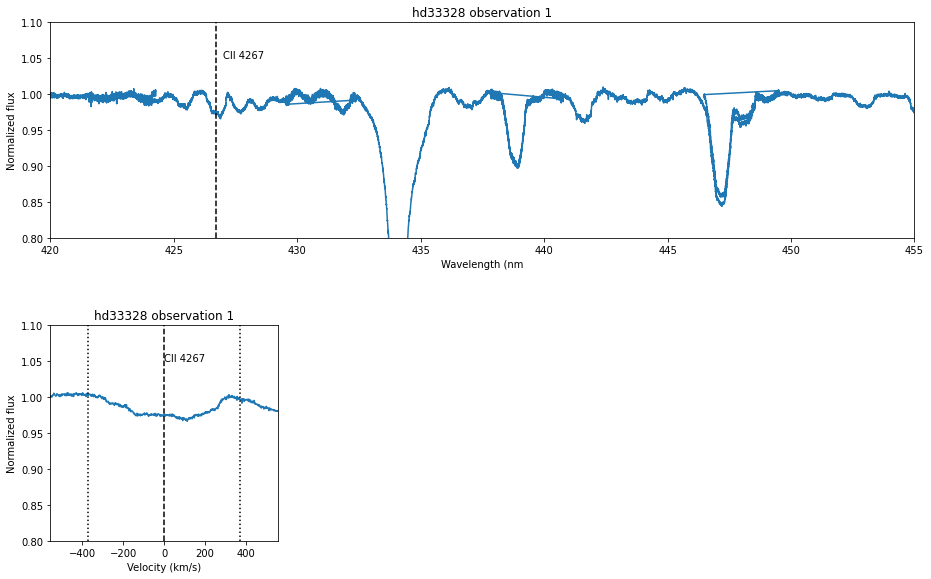

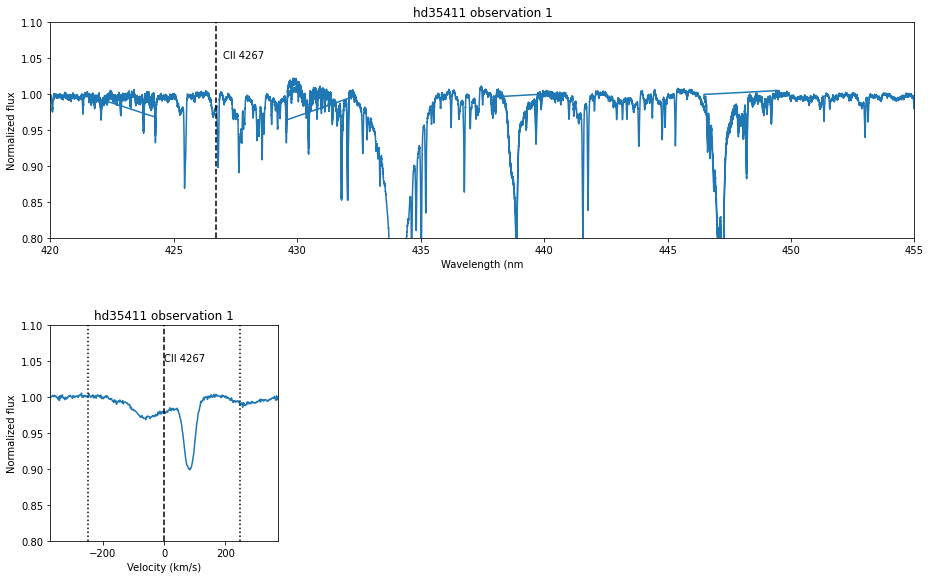

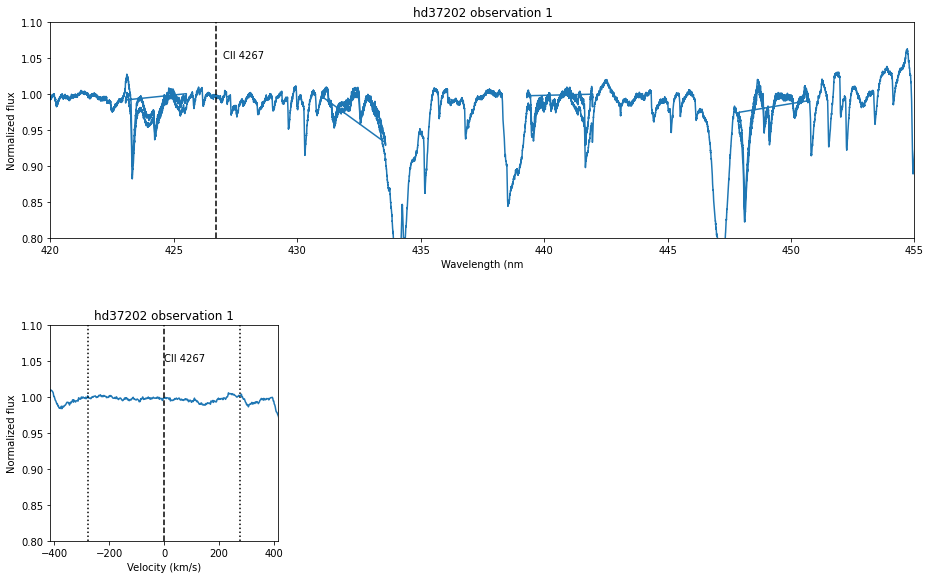

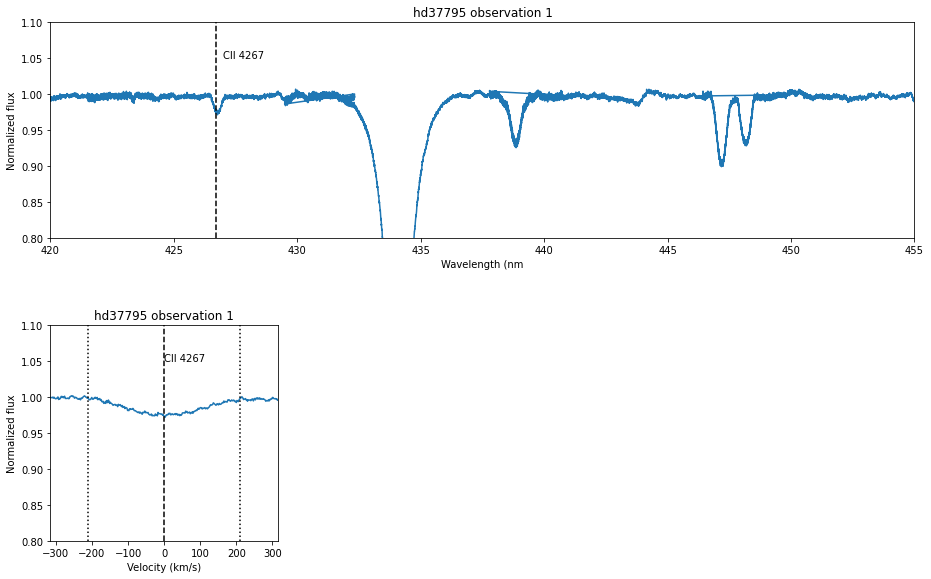

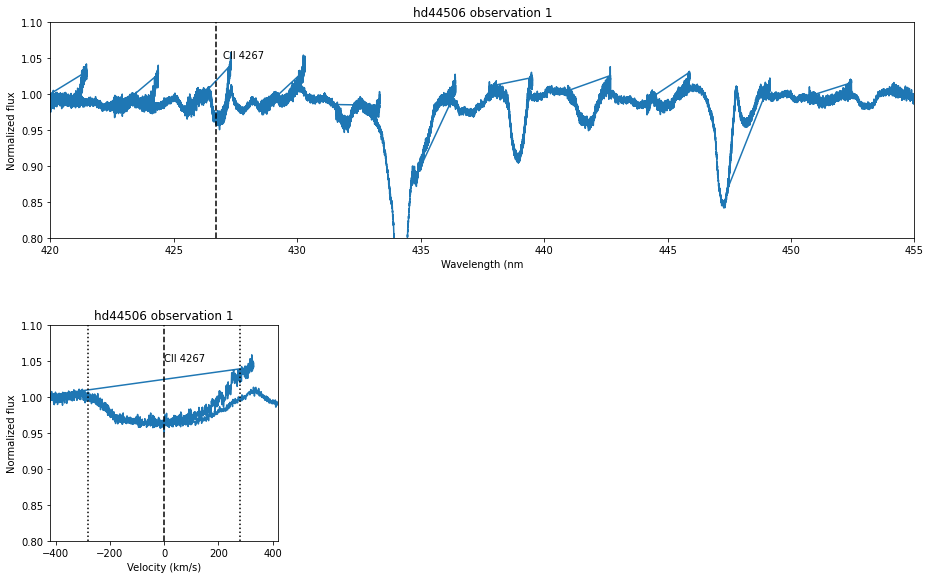

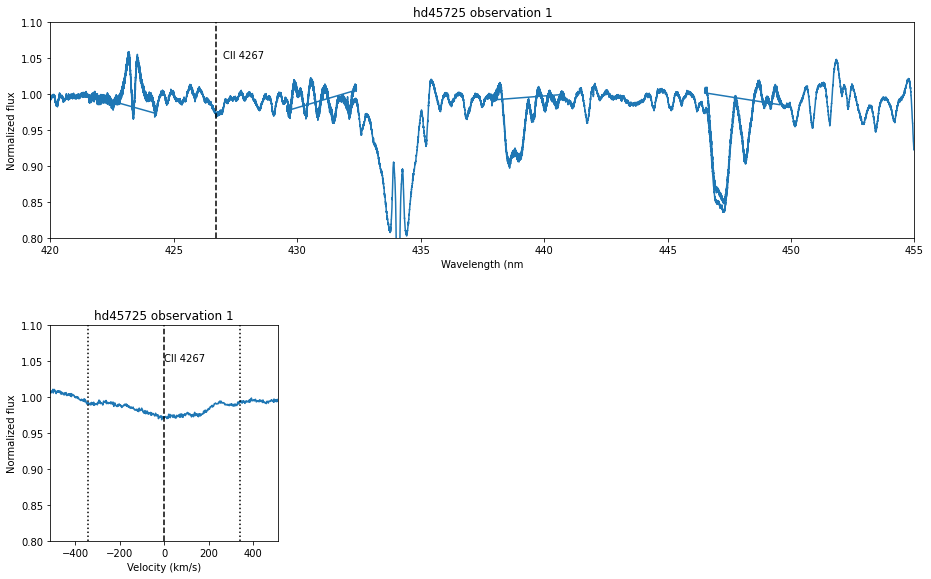

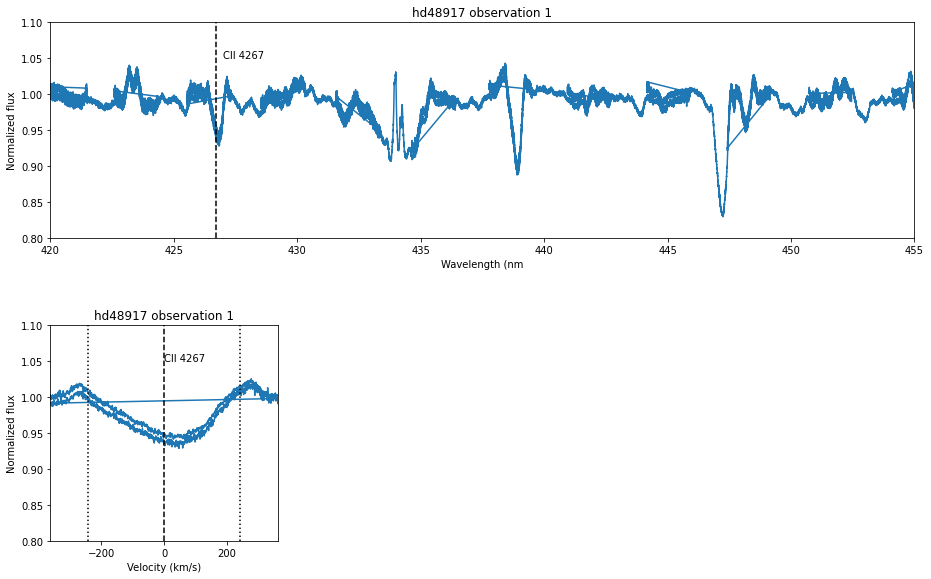

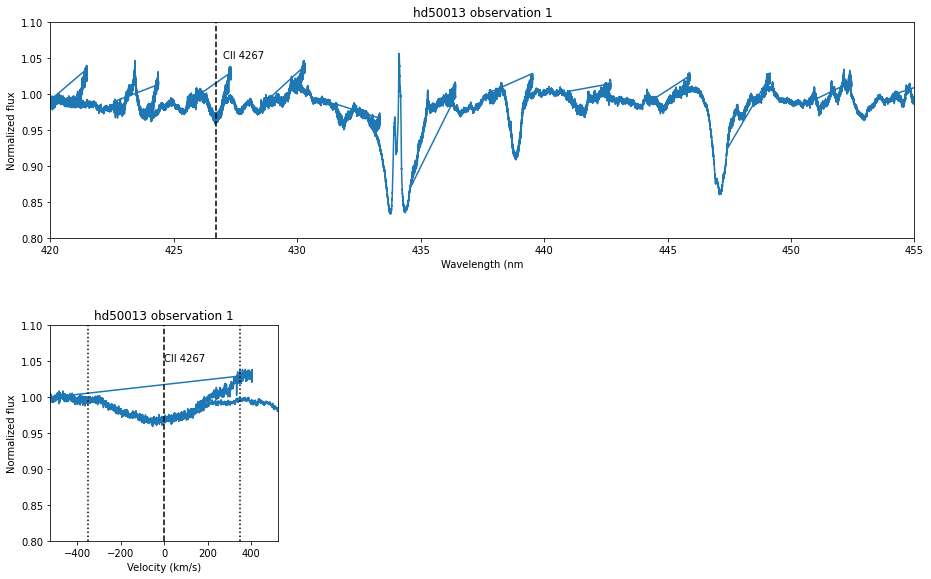

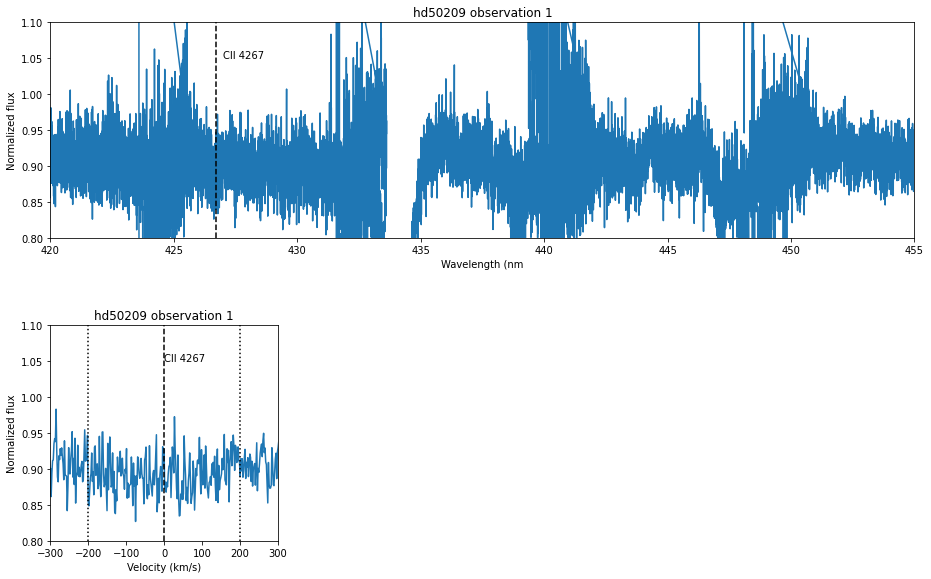

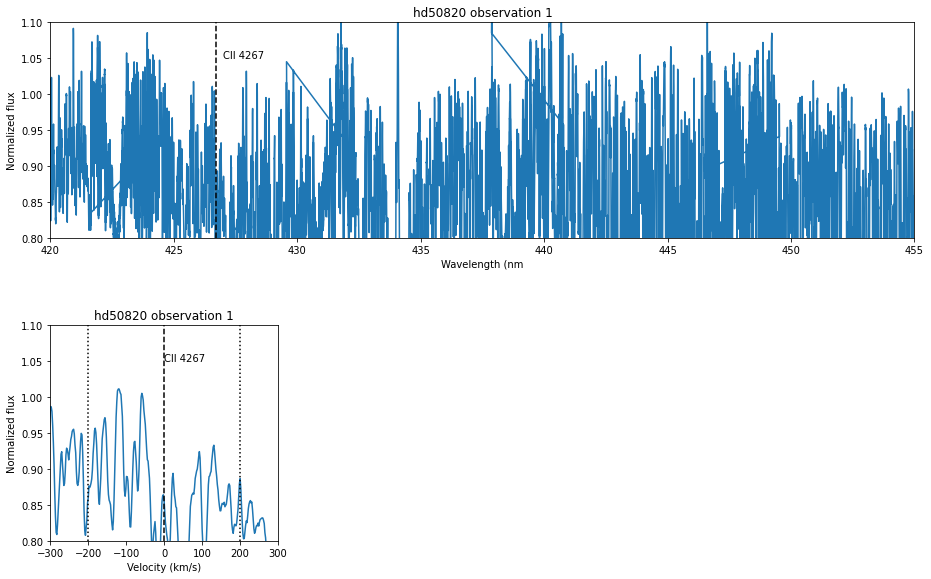

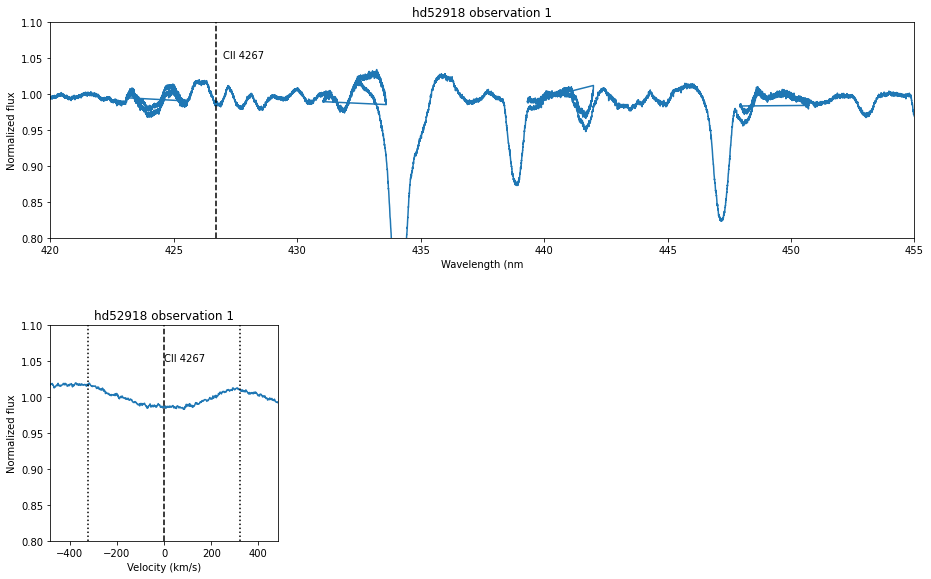

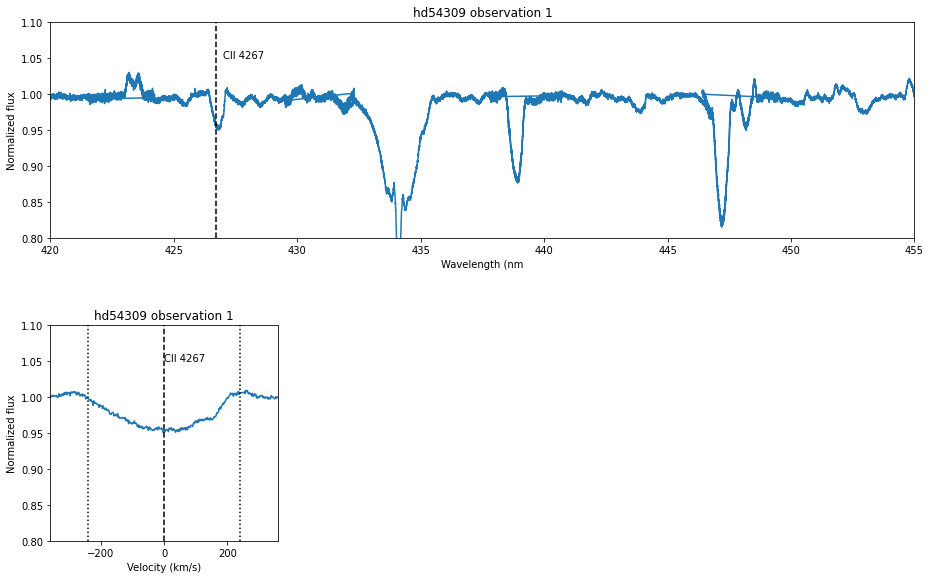

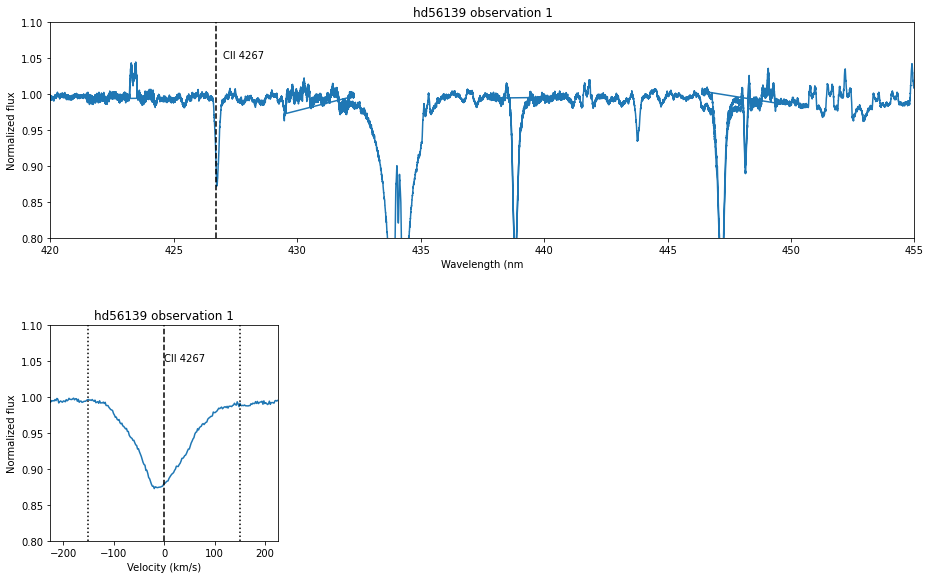

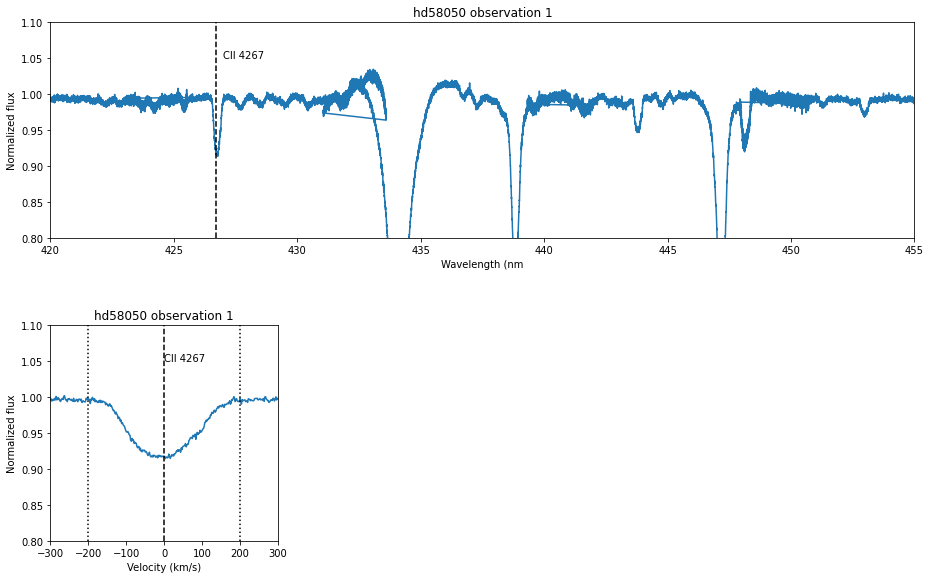

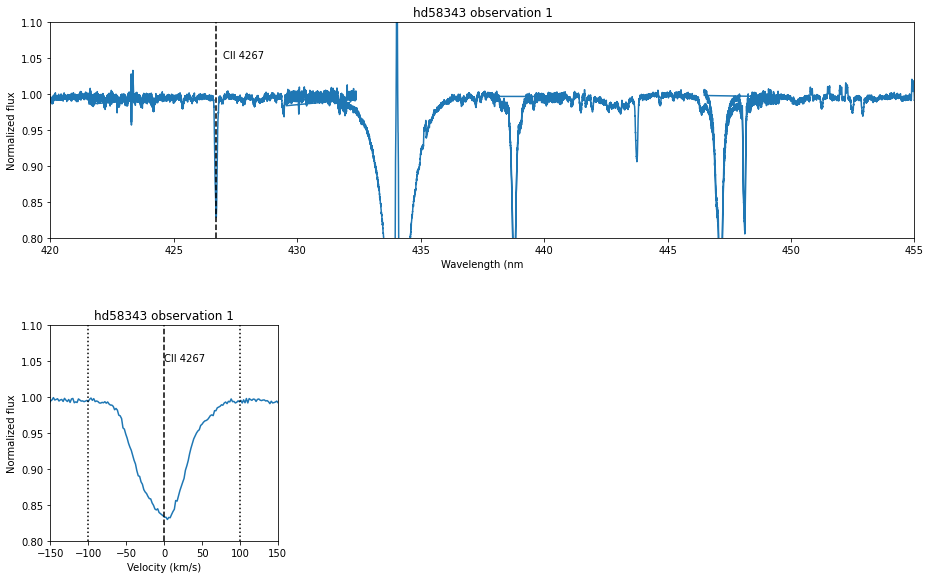

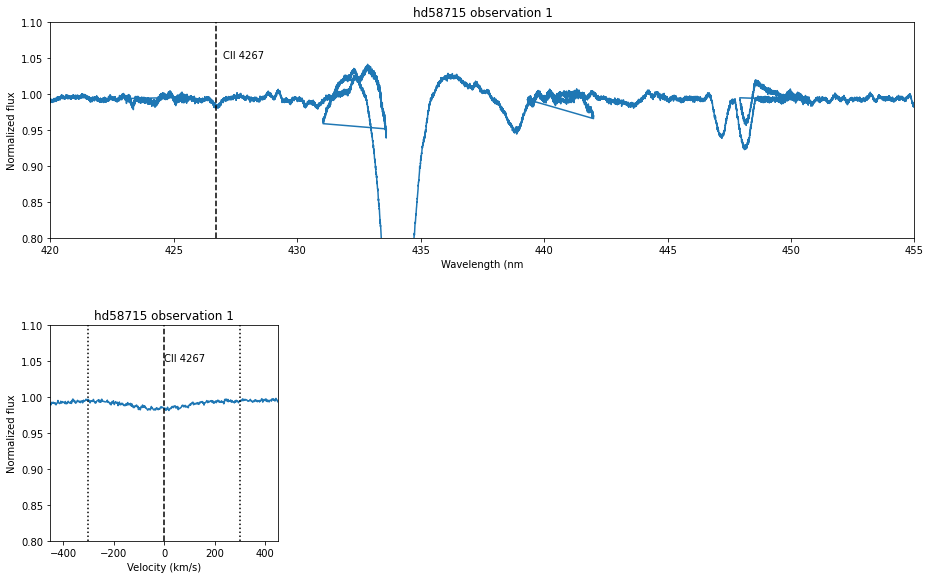

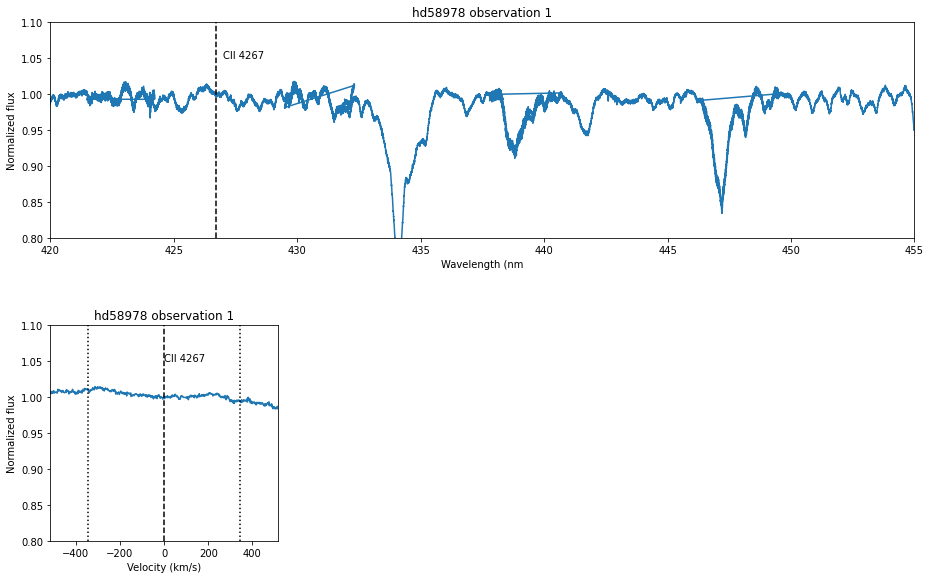

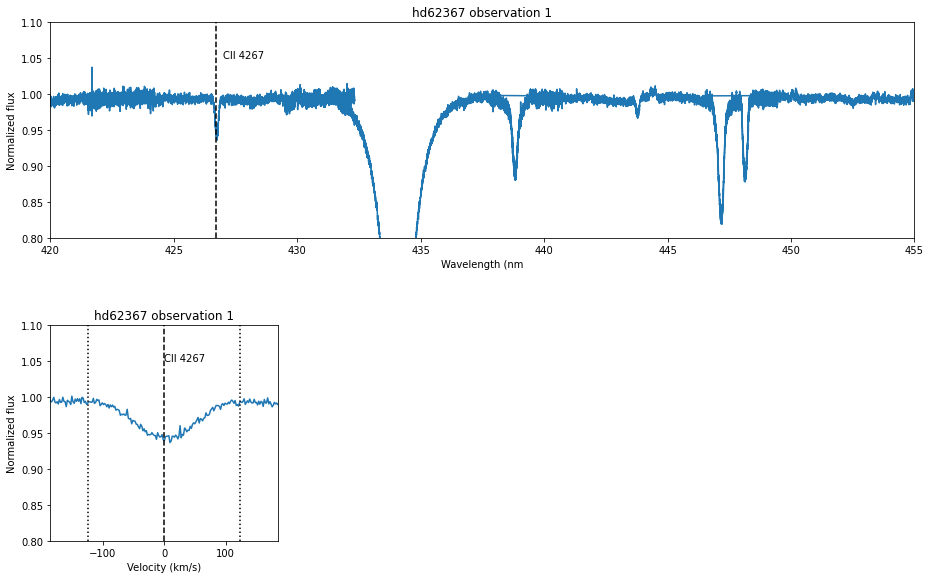

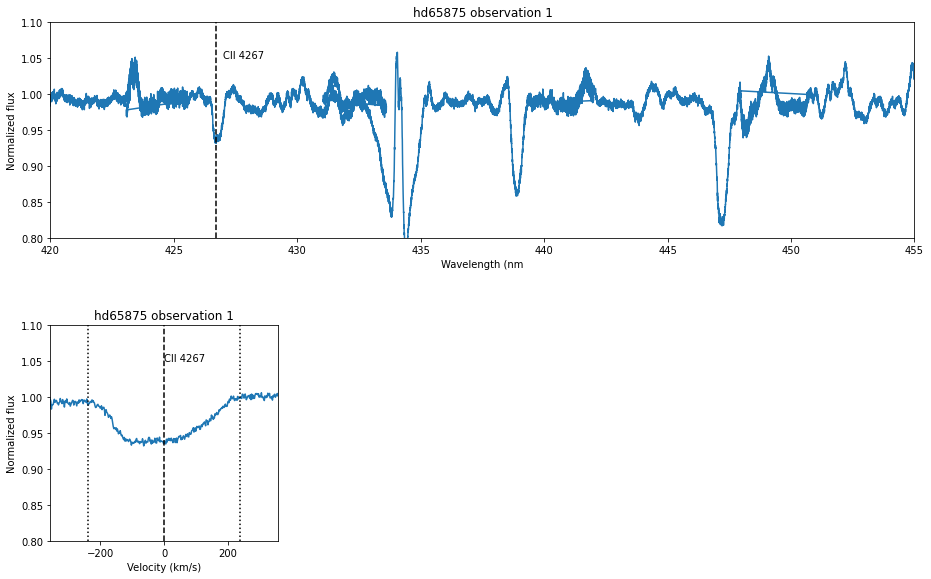

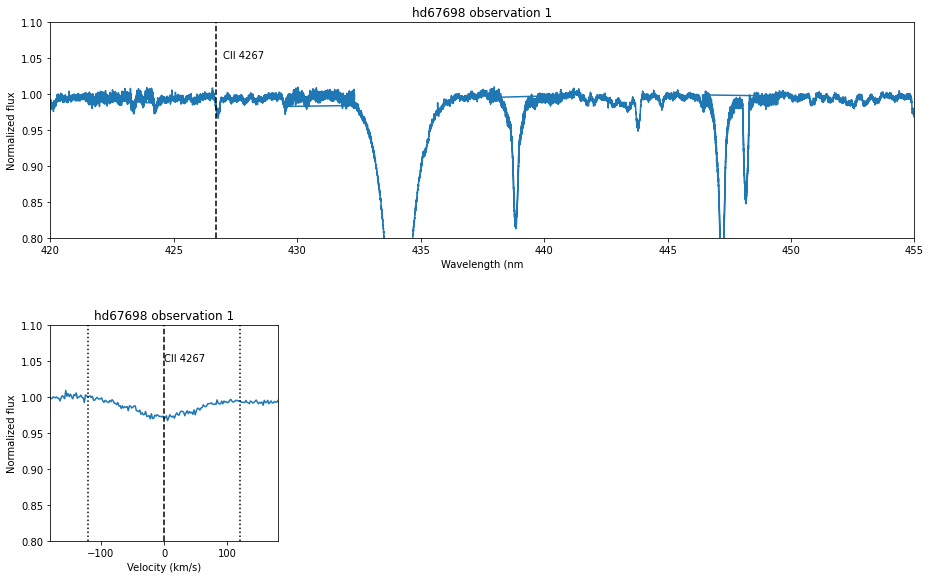

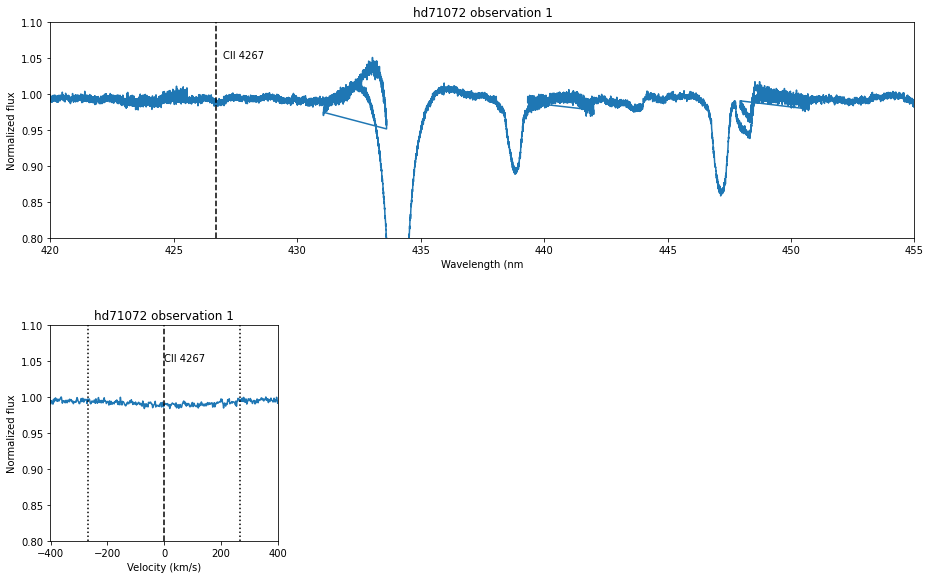

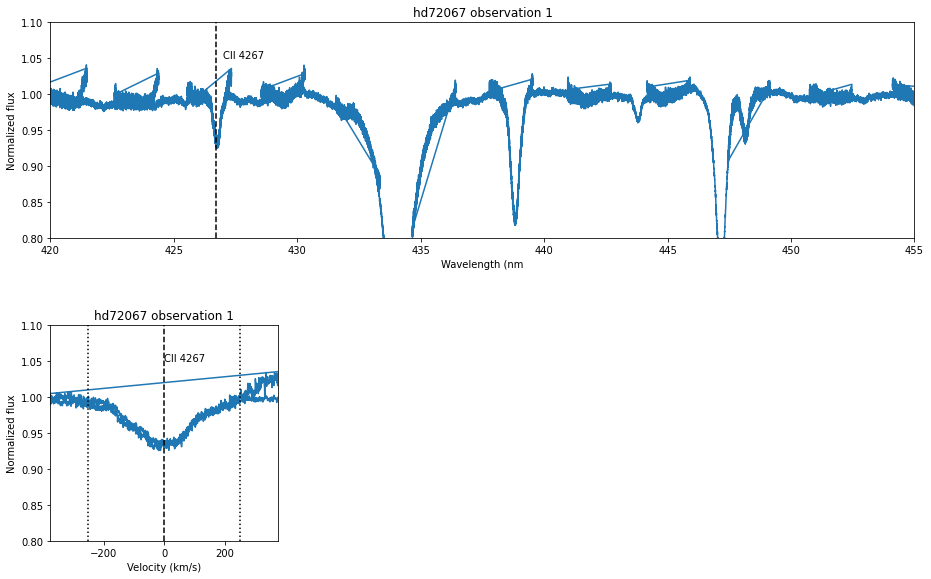

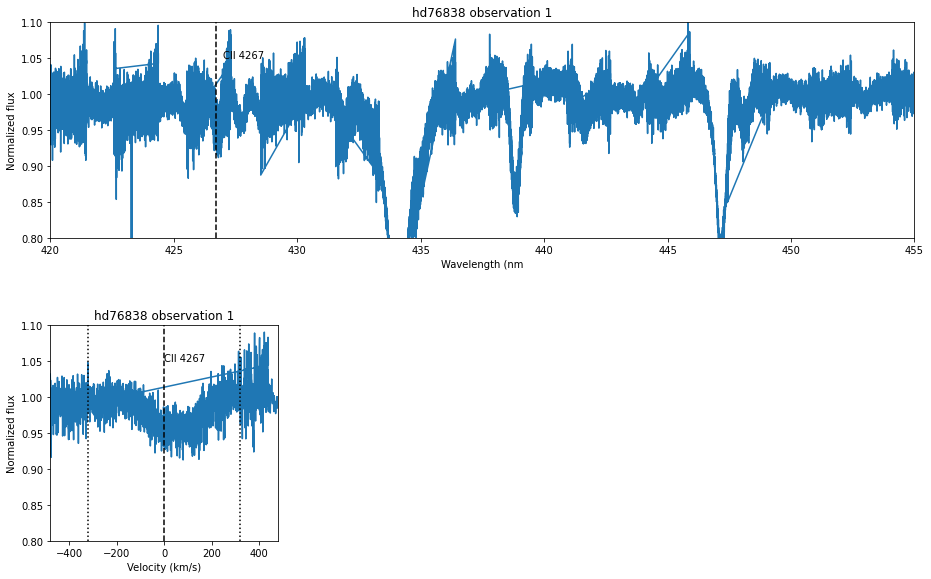

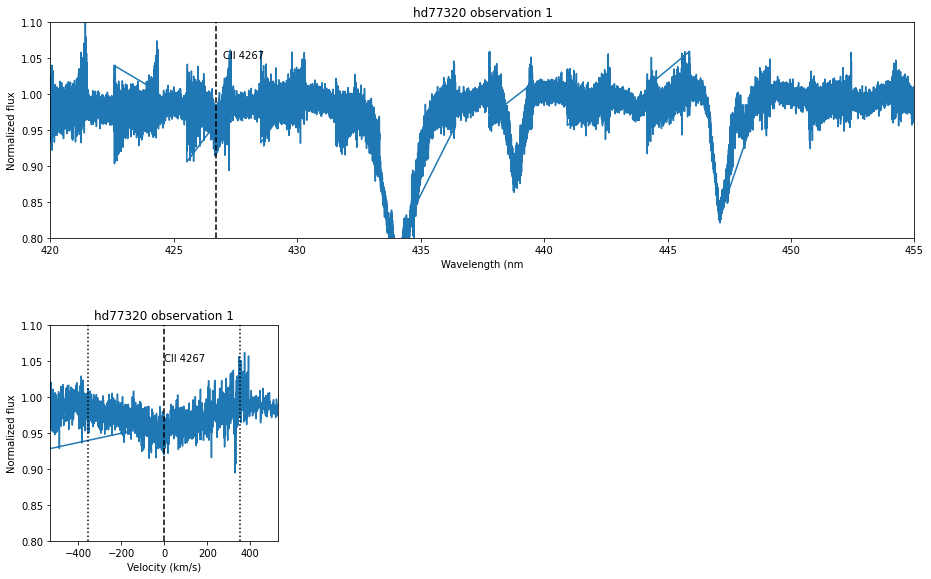

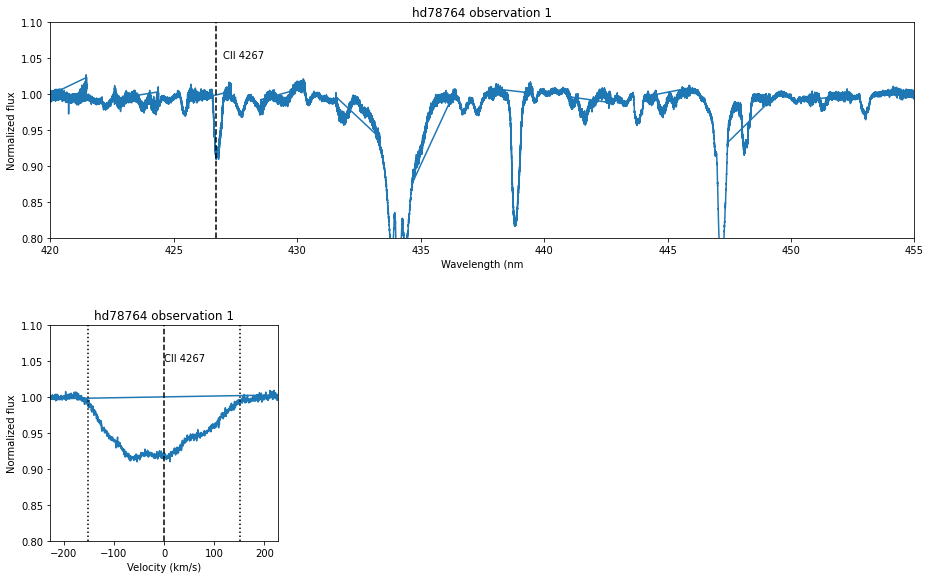

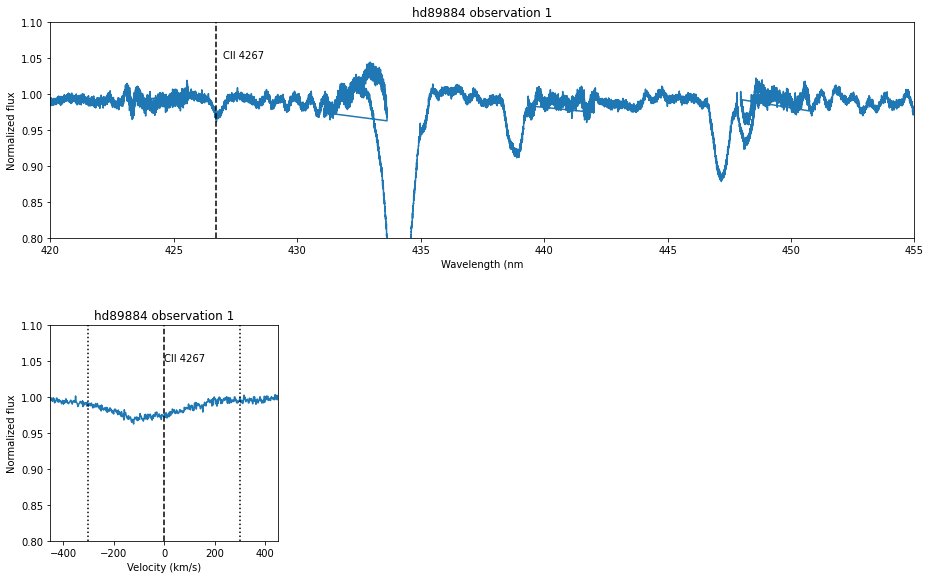

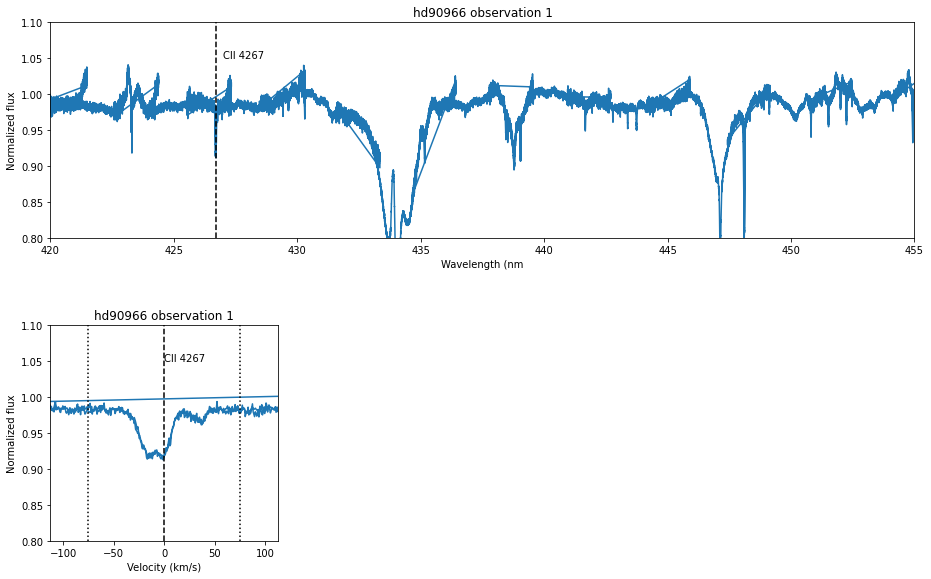

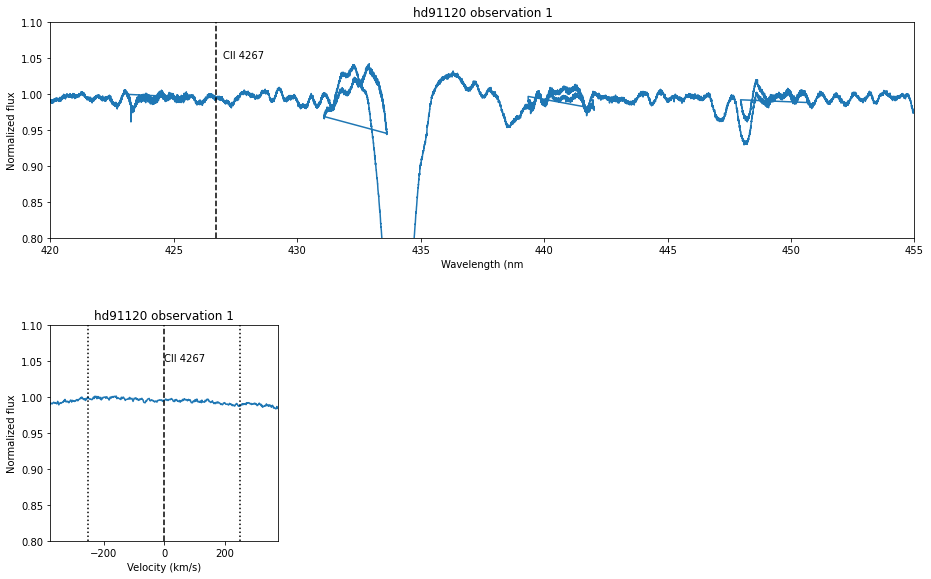

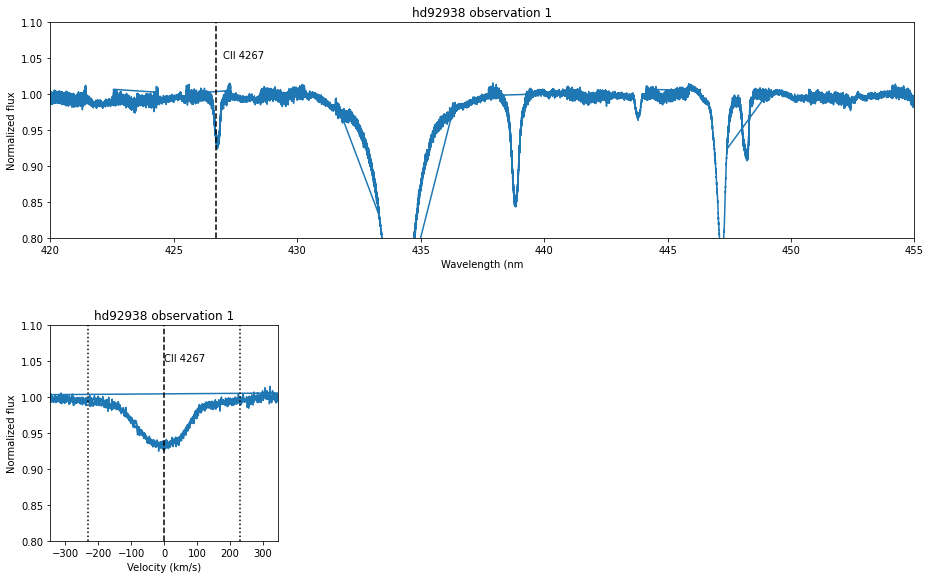

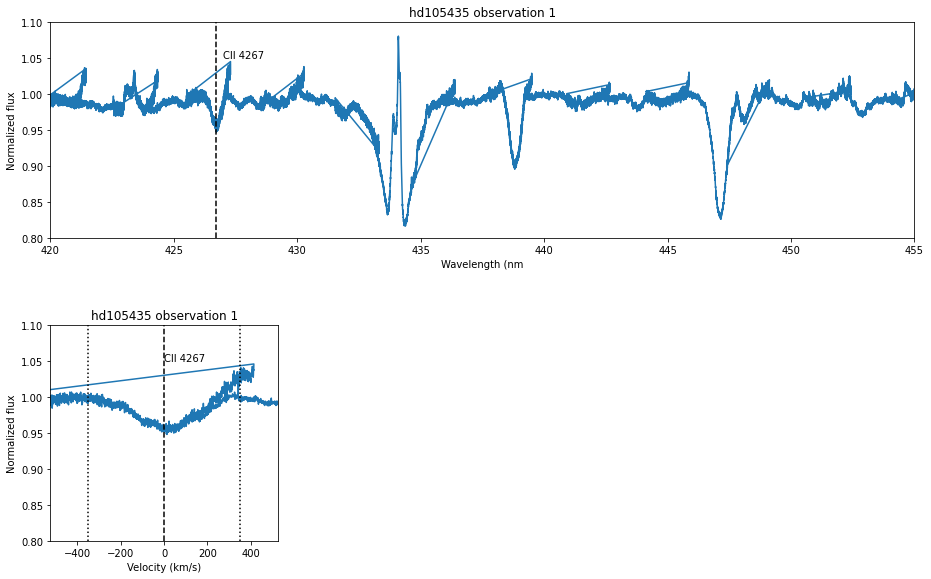

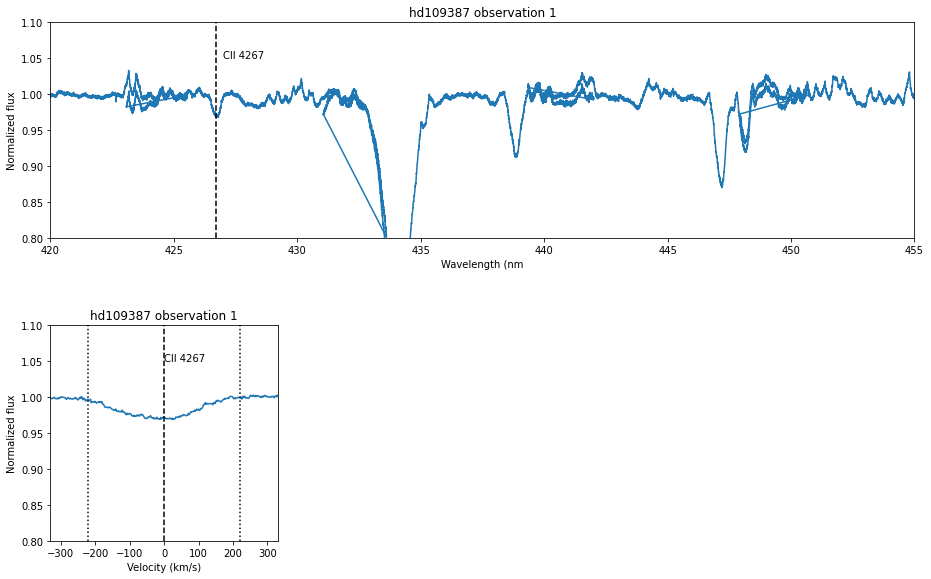

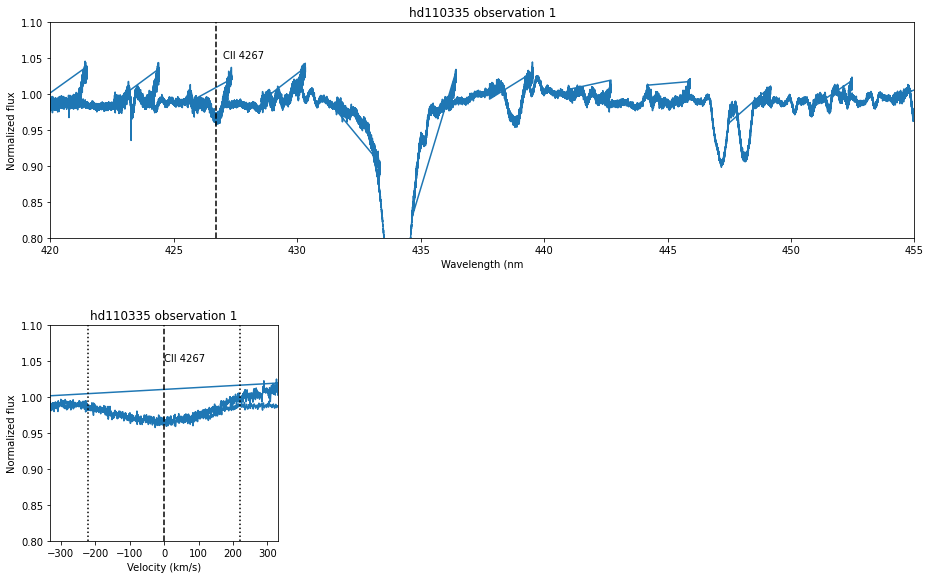

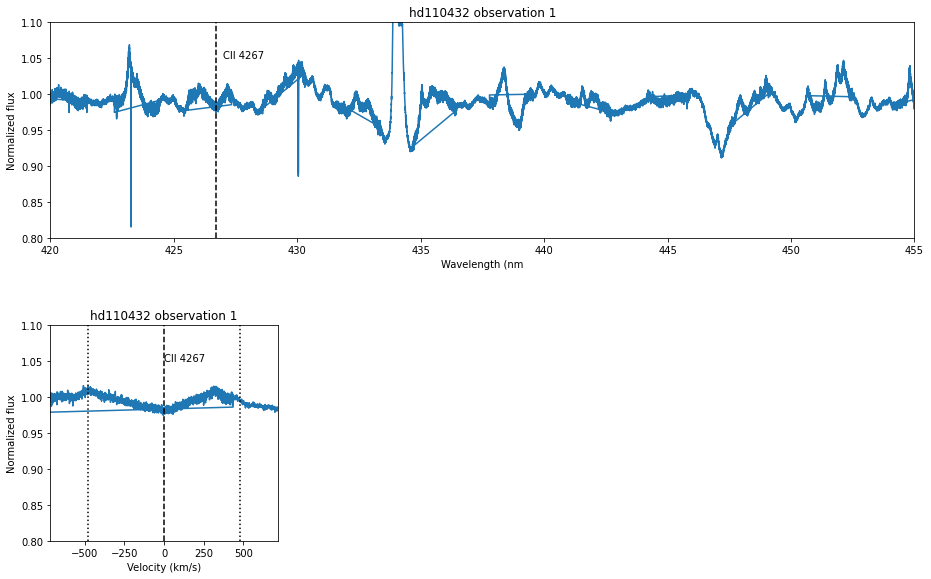

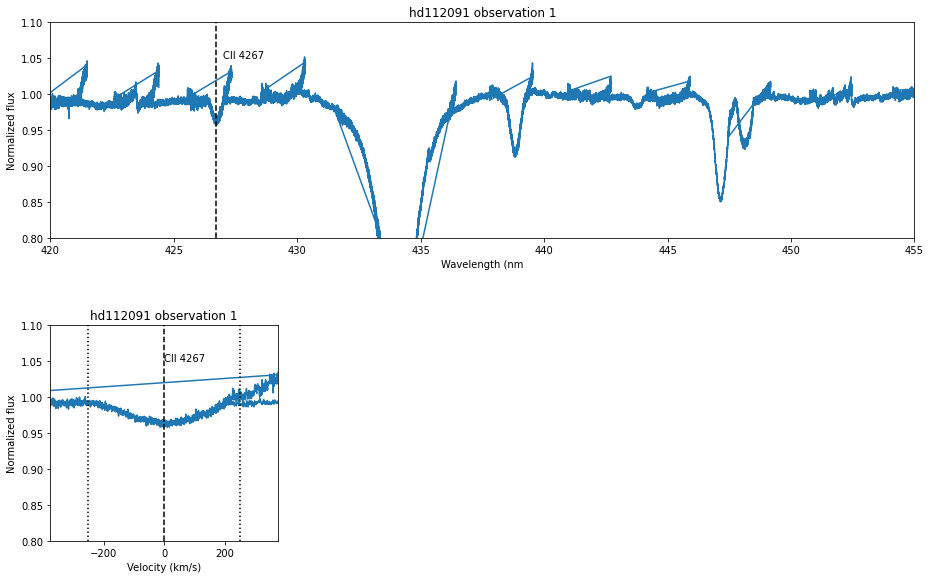

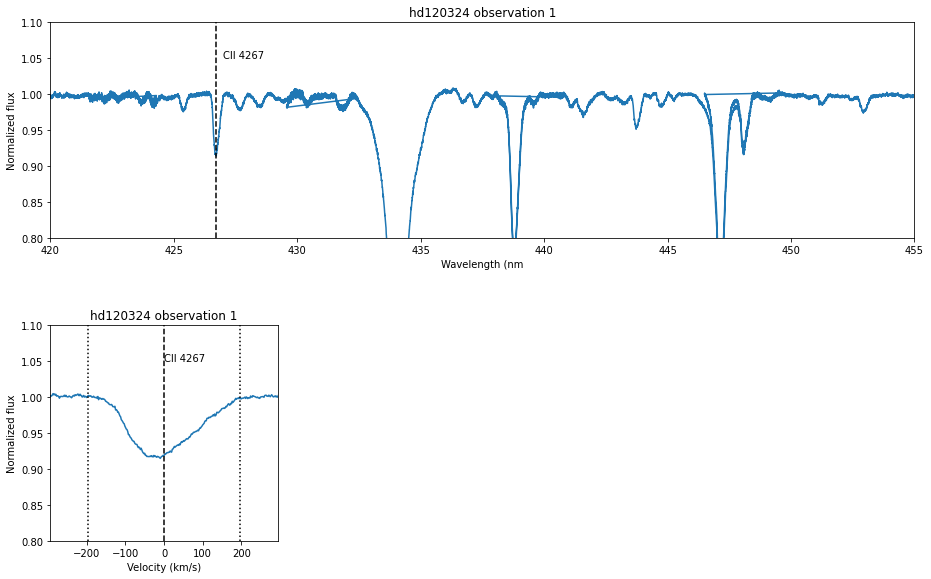

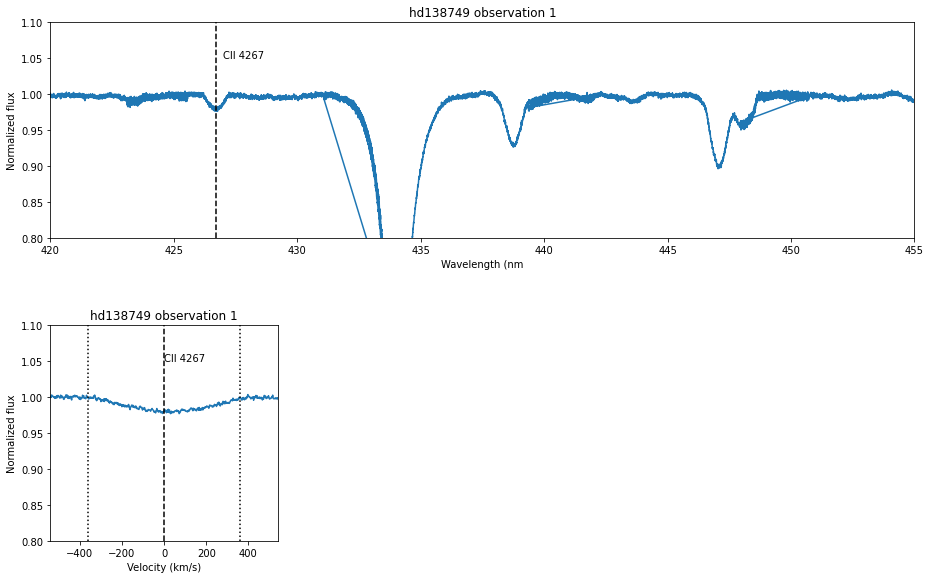

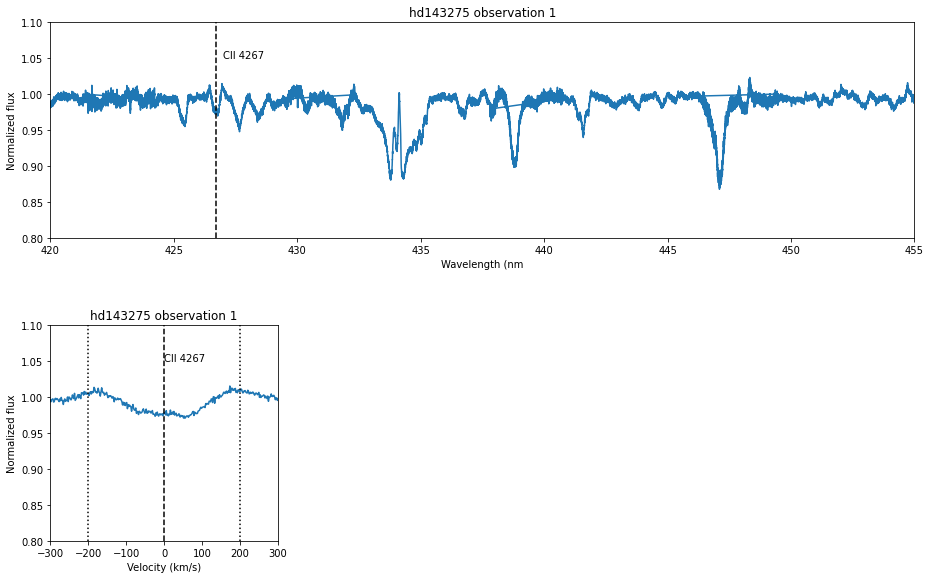

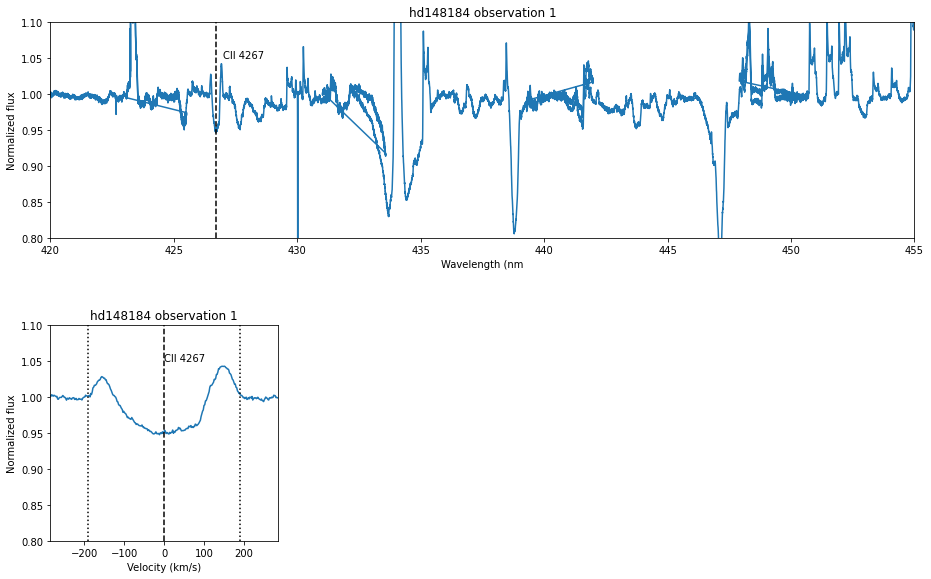

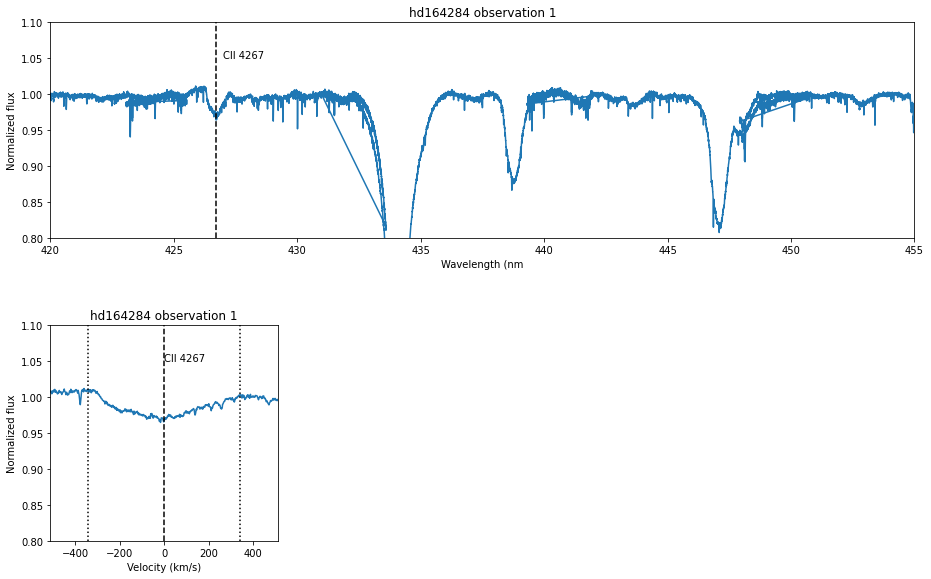

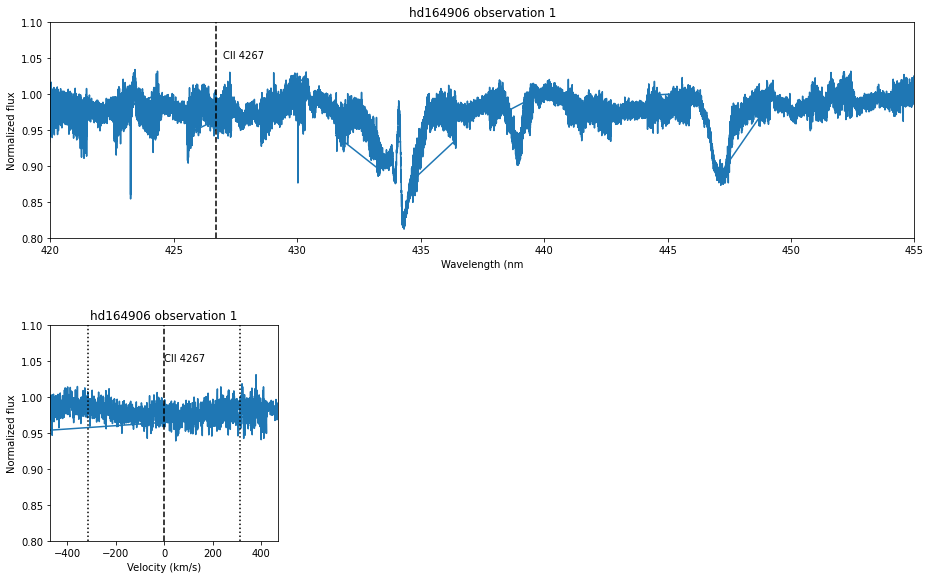

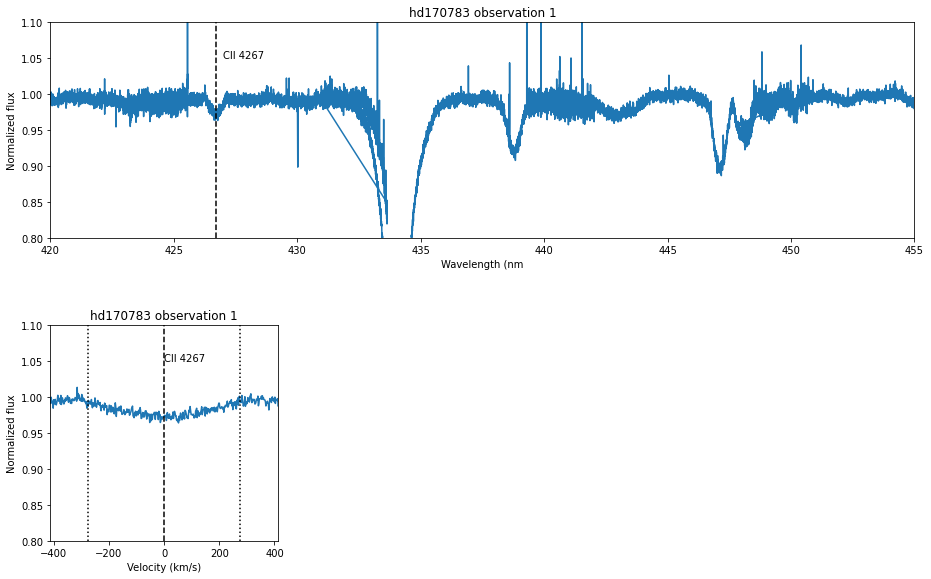

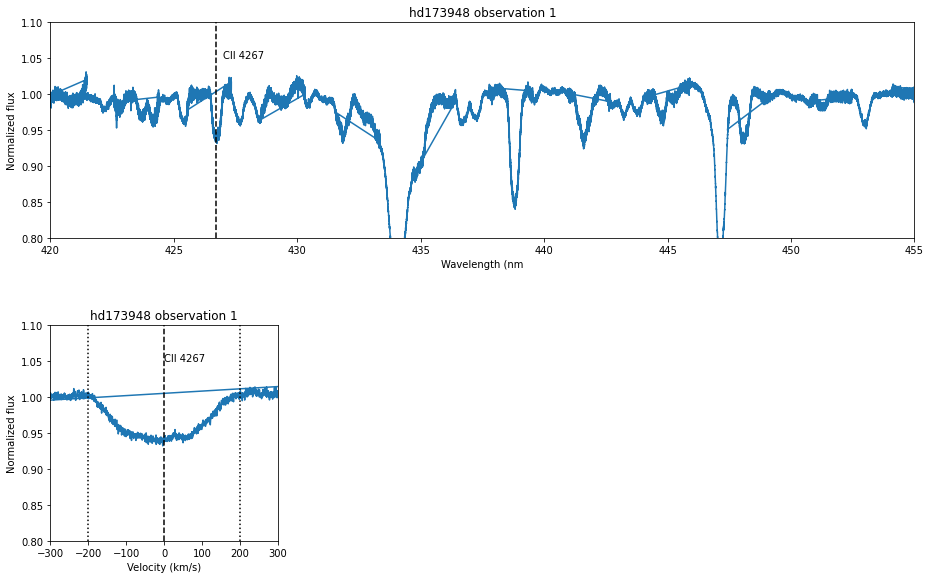

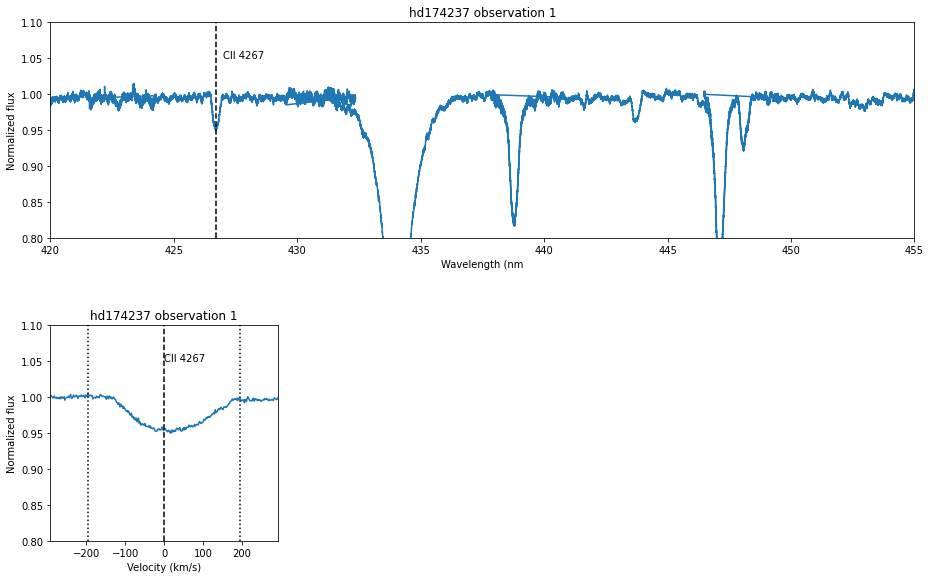

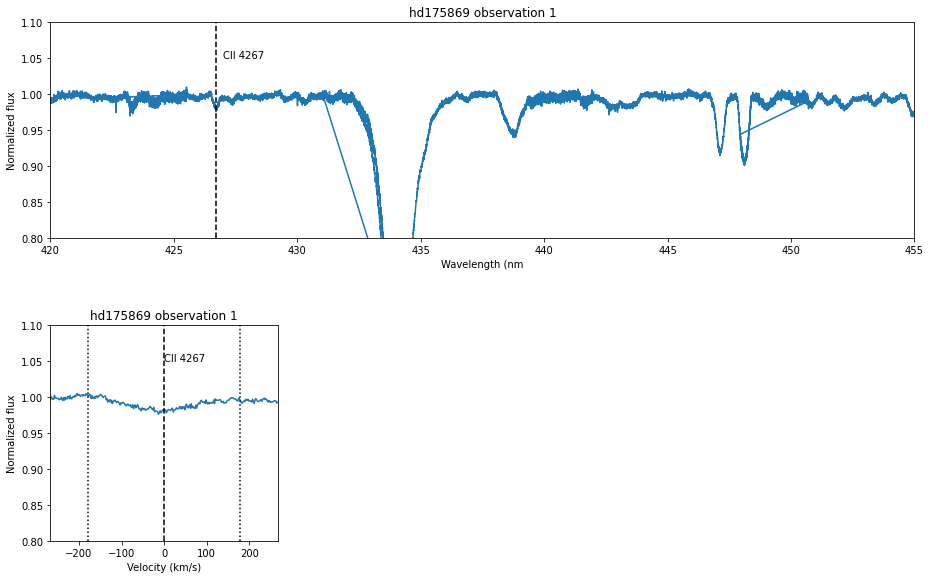

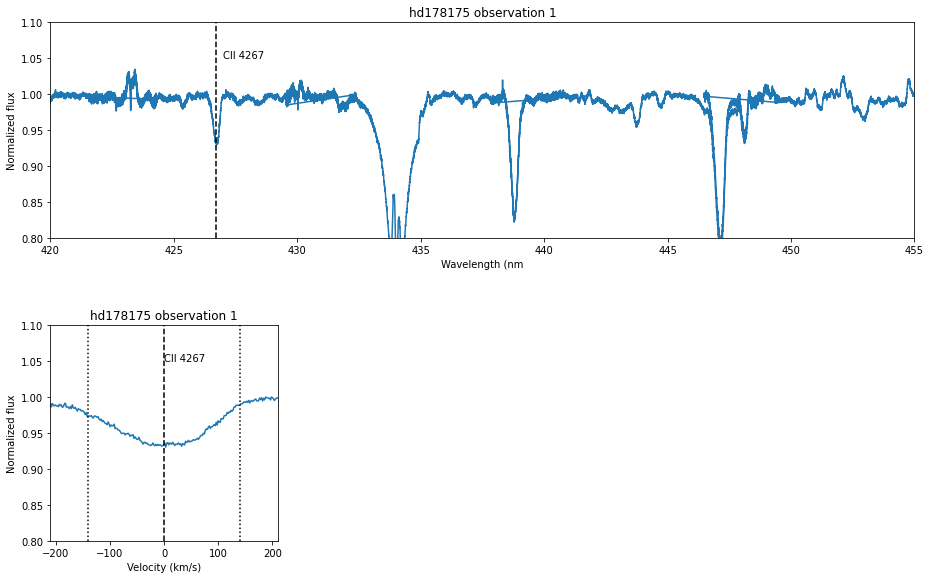

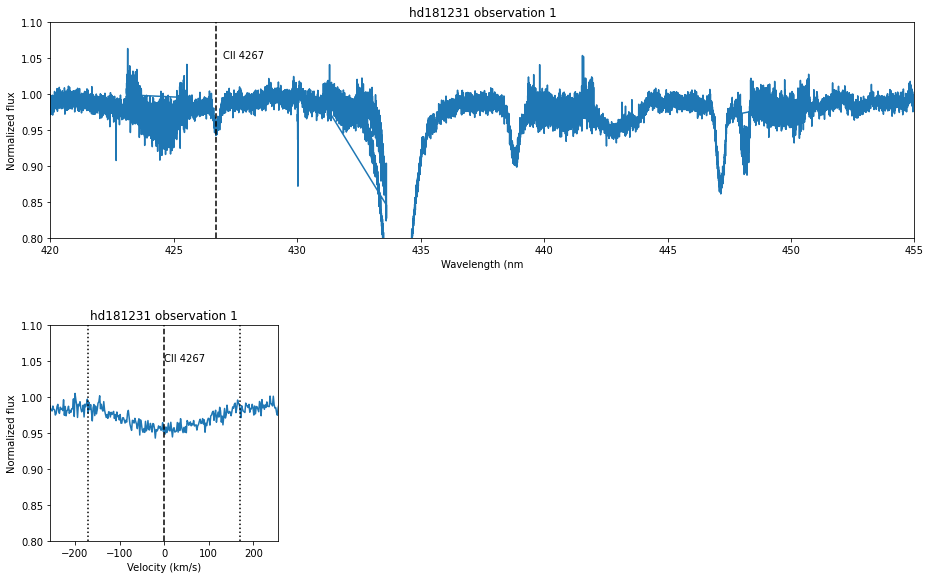

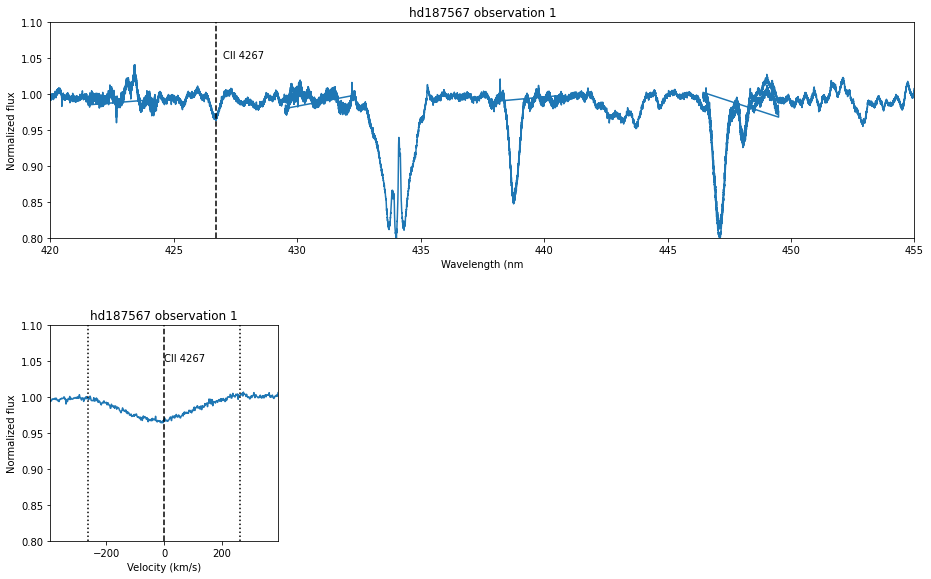

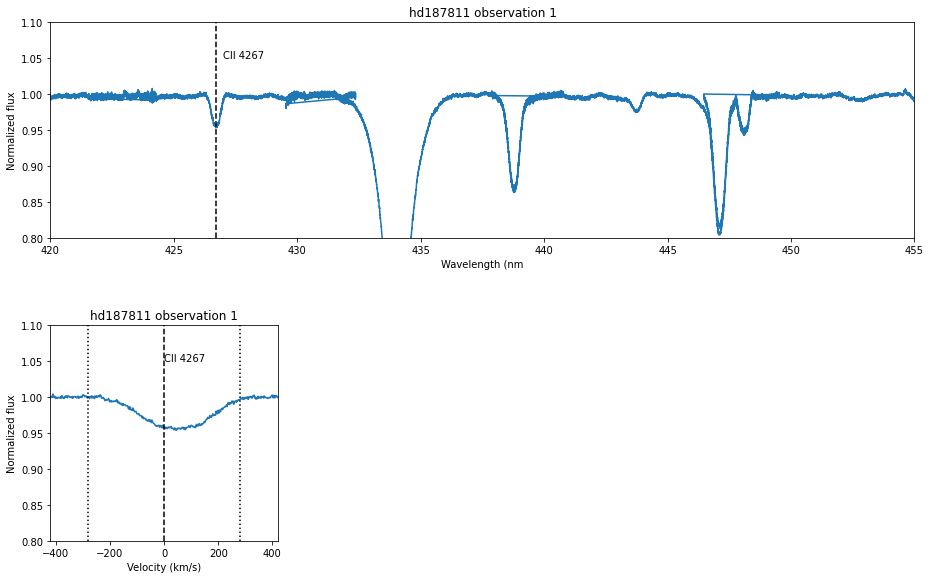

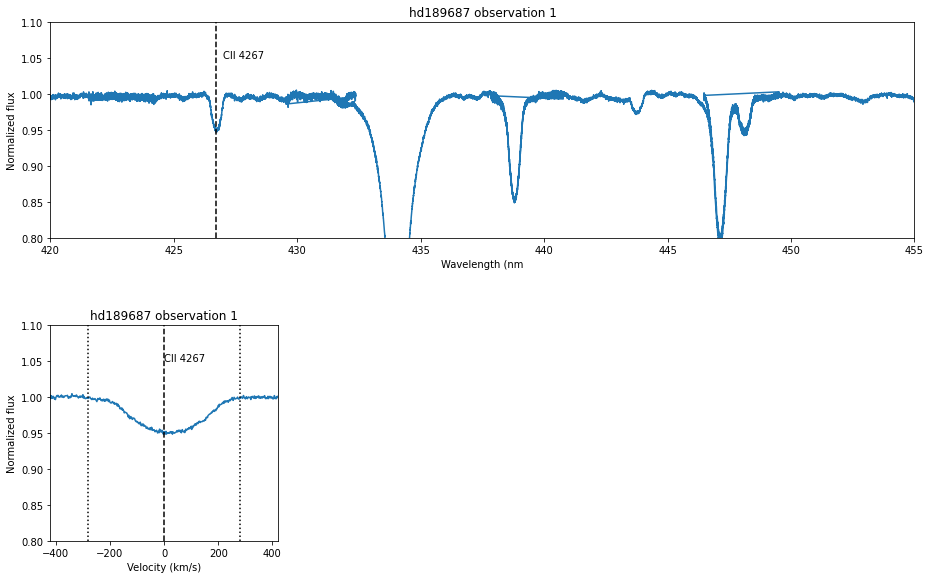

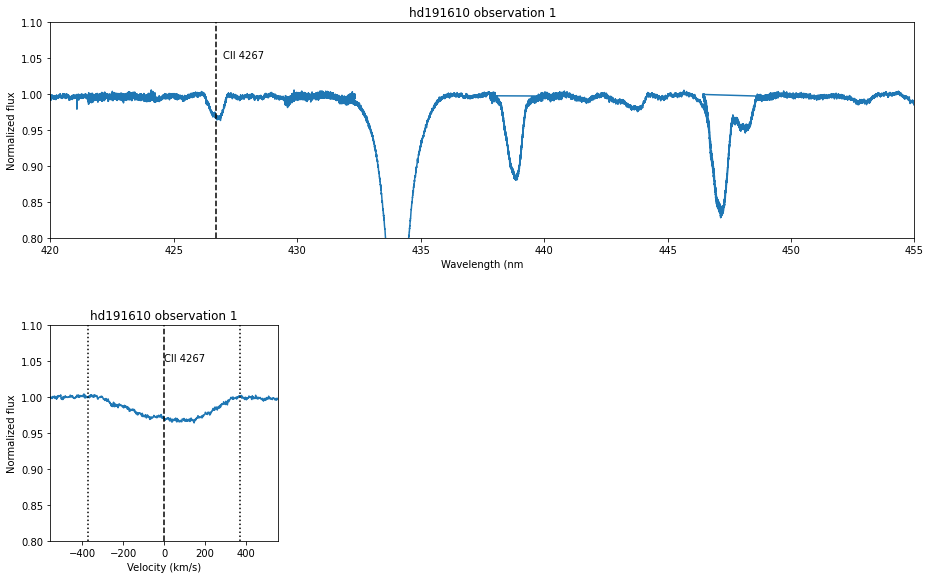

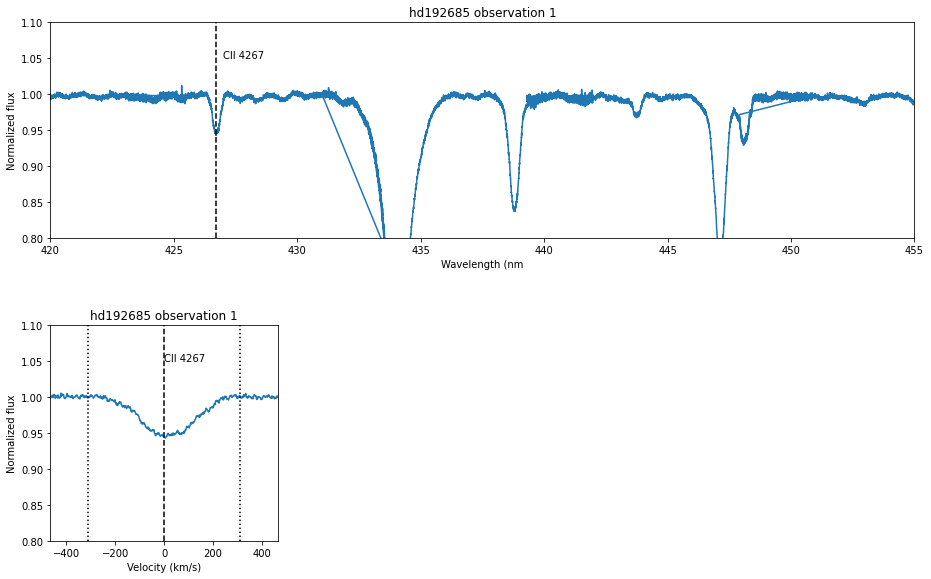

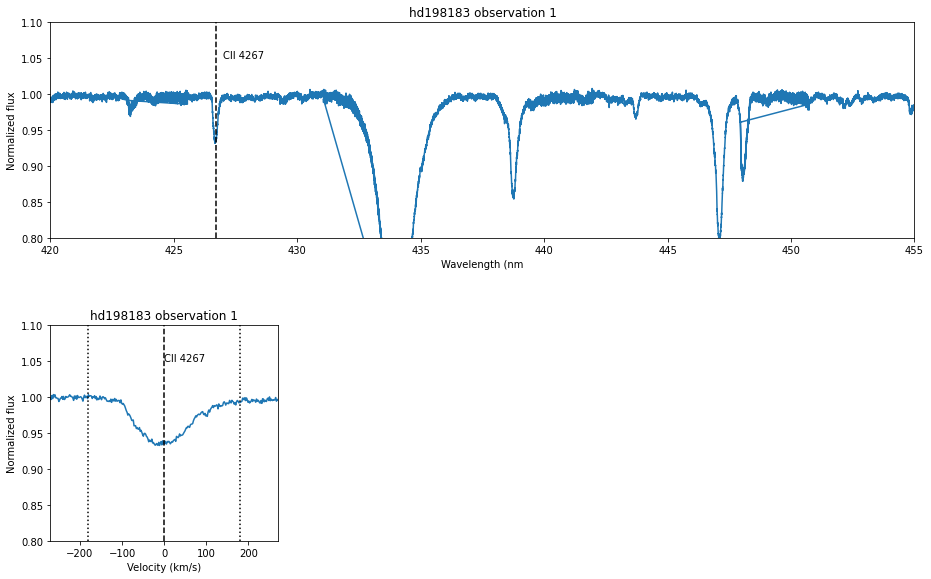

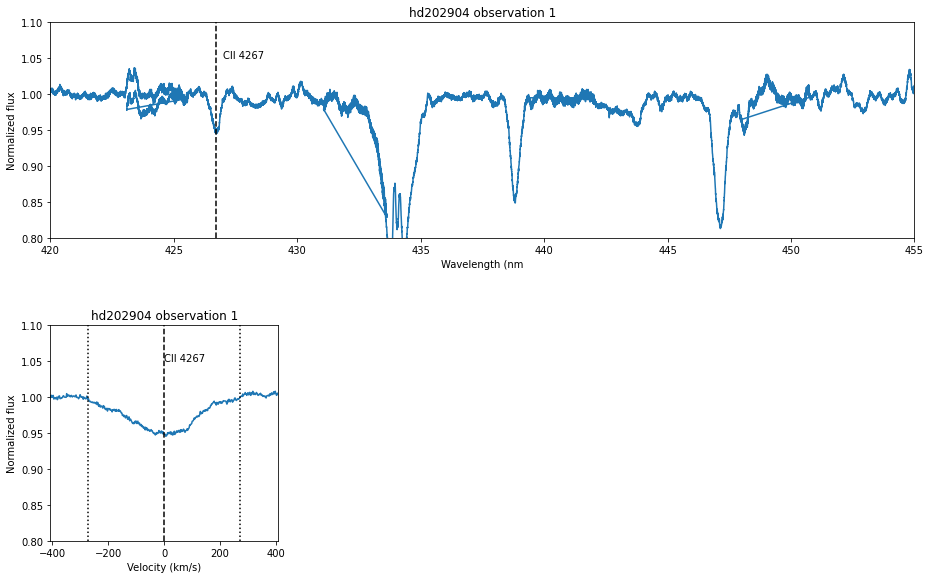

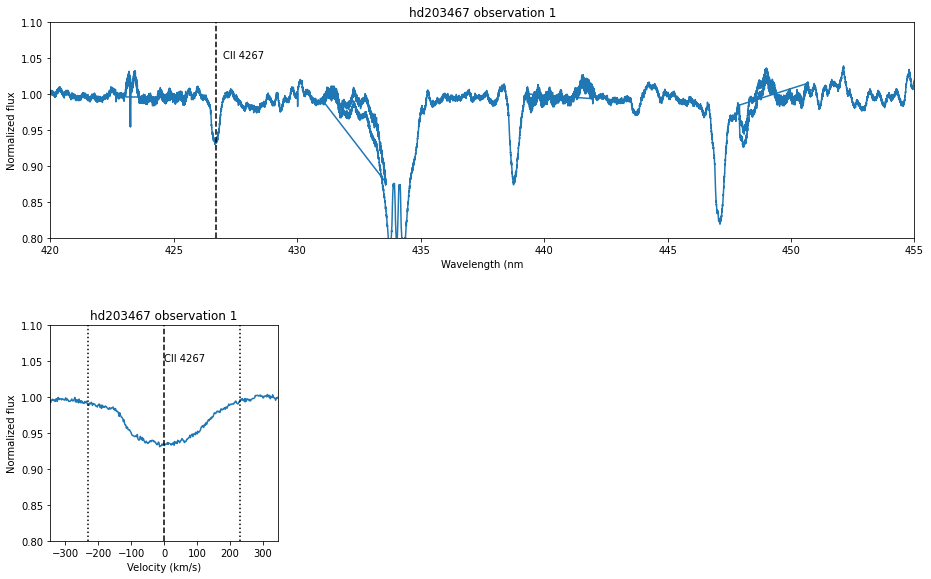

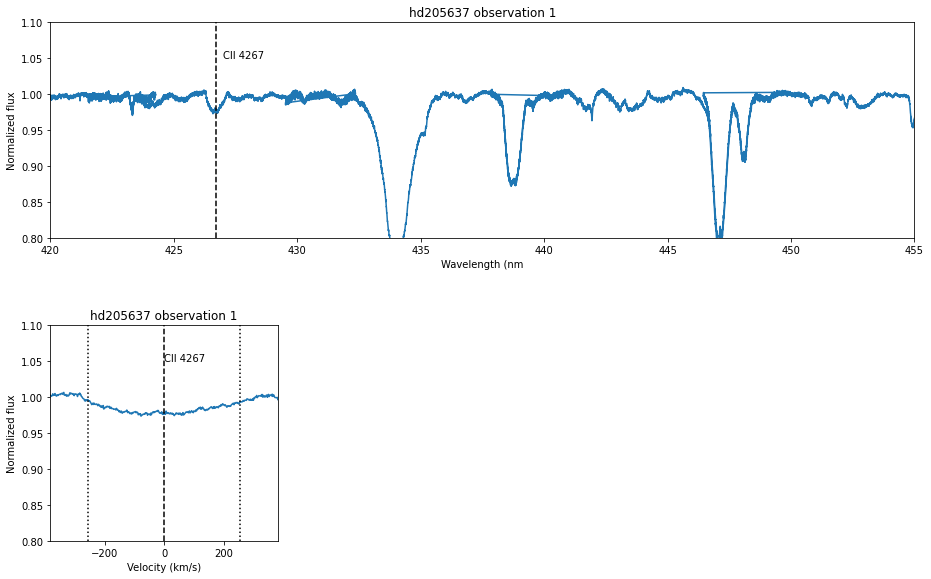

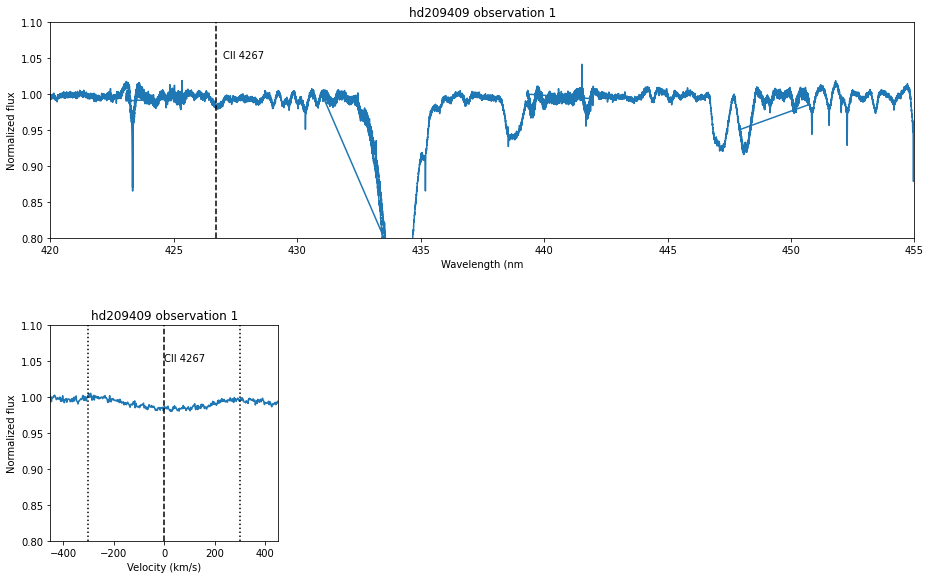

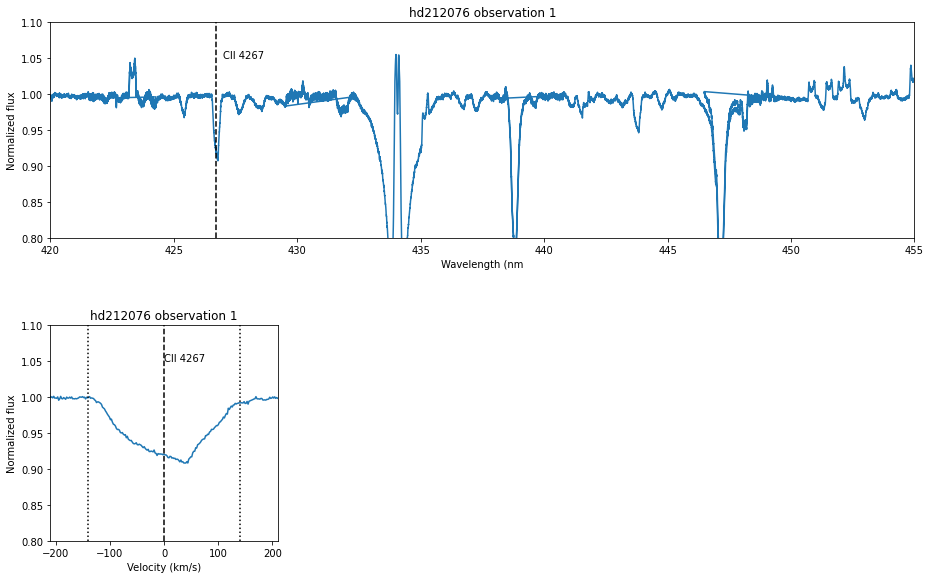

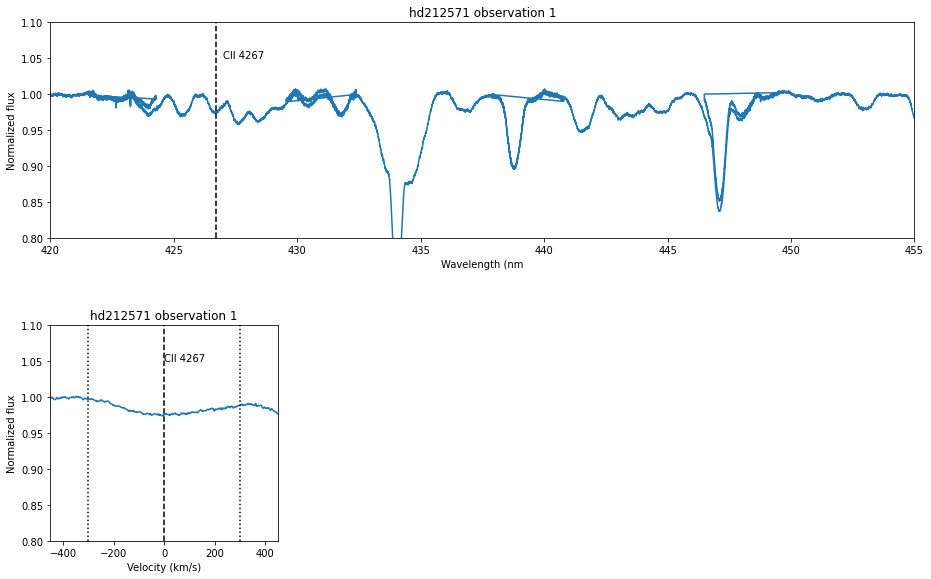

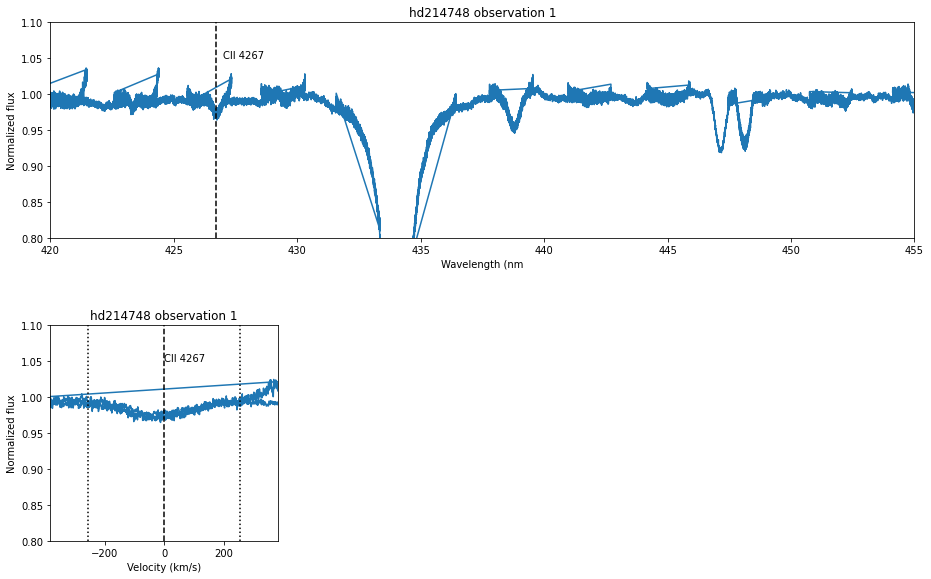

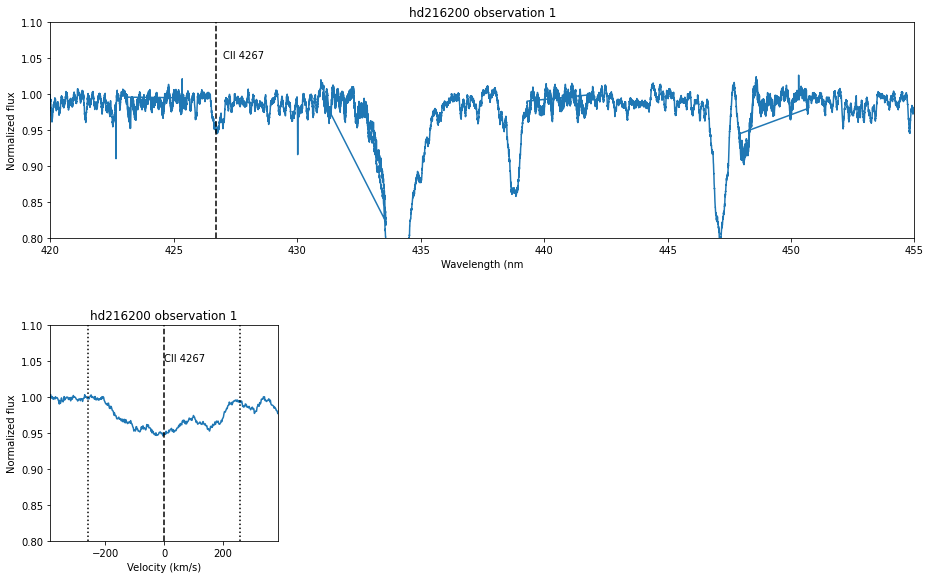

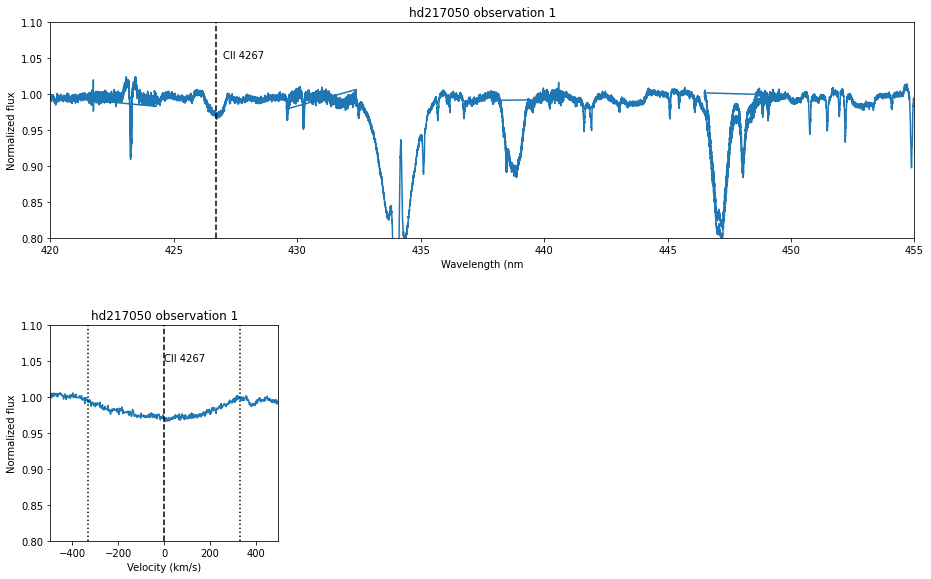

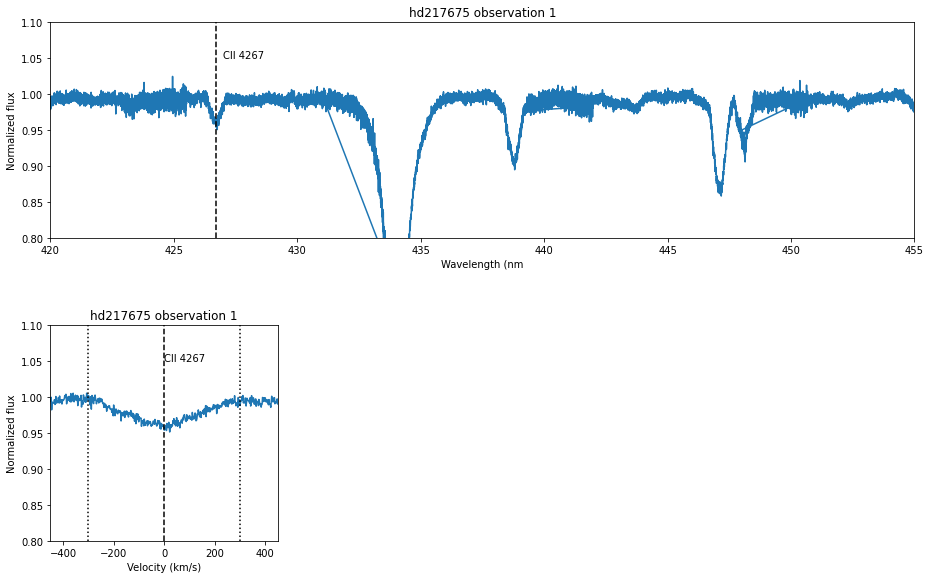

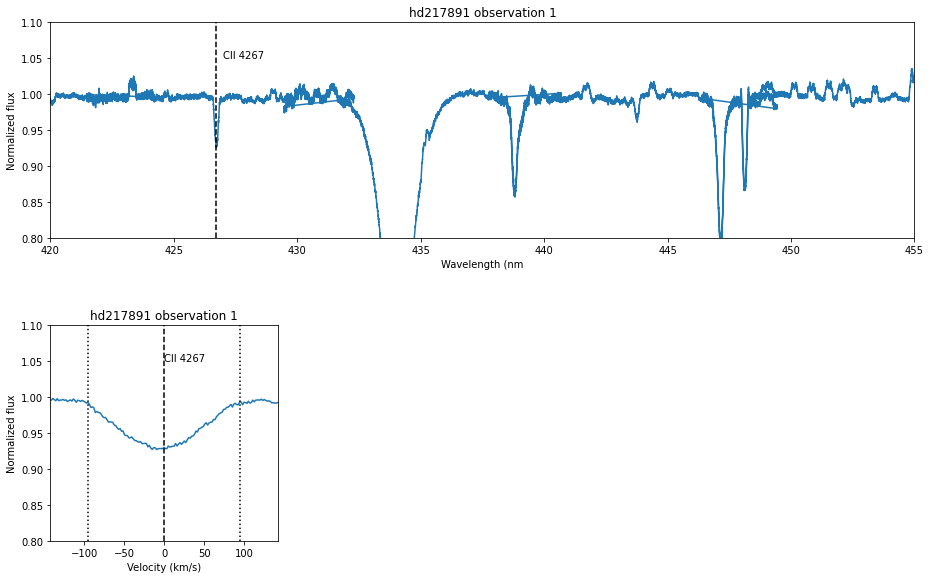

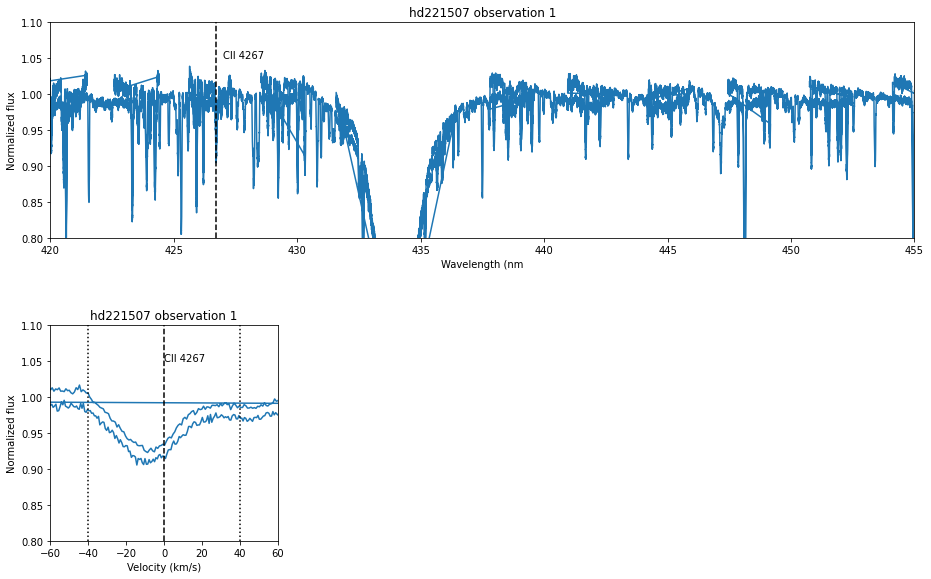

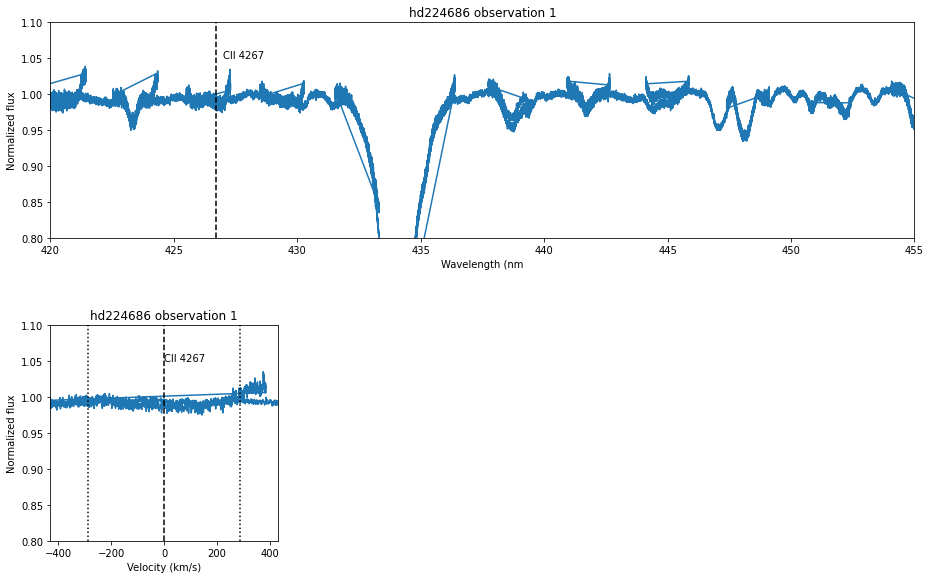

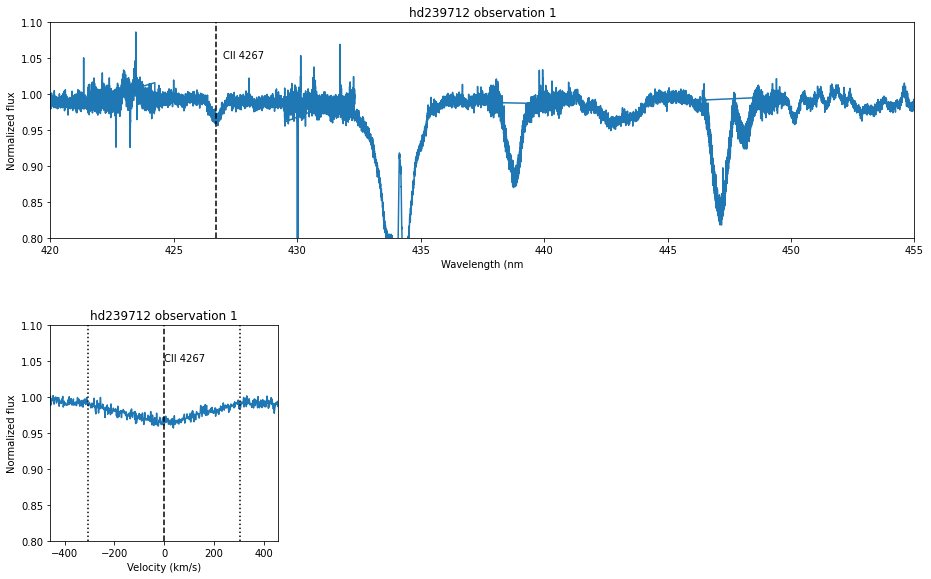

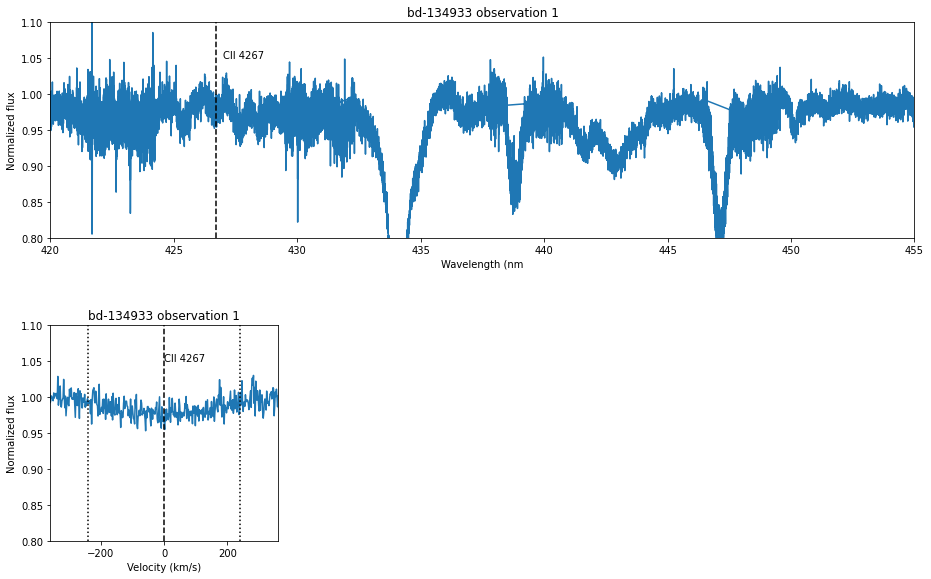

In [ ]:
# Code by Dax Moraes and Marisol Catalan Olais 
with PdfPages('NormalizedSpectra_CII_dataonly.pdf') as pdf:

  for j, StarInfo in StarData.iterrows():
    AdoptVsini = StarInfo["Adopted-vsini"] # StarInfo is the row for the i-th star

    StarName = StarInfo["Name"] 
    ObsInfo = Observations.loc[Observations["NameAsif"] == StarName + '_1'] # this only accounts for the first observation of a star, which is in the "NameAsif" column
   
    for i, row in ObsInfo.iterrows():
      Vrad =  float(row["vradCorrected"]) * u.km/u.s
    
    file = 'NormalizedSpectra/{}_1.s'.format(StarName)
    data = pol.iolsd.read_spectrum(file)

    CII = 426.726 *u.nm
   
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))
    fig.tight_layout()
    ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=2, rowspan = 1)
    ax2 = plt.subplot2grid((2, 3), (1, 0))
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

    ax1.plot(data.wl, data.specI)
    ax1.set_xlim(420,455)
    ax1.set_ylim(0.8, 1.1)
    ax1.axvline(x=CII.value, c='k', ls='--')
    ax1.text(427, 1.05, 'CII 4267')
    ax1.set_xlabel('Wavelength (nm')
    ax1.set_ylabel('Normalized flux')
    ax1.set_title('{} observation 1'.format(StarName))

    vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    ax2.plot(vel-Vrad, data.specI) 
    ax2.set_xlim(-1.5*AdoptVsini, 1.5*AdoptVsini)
    ax2.set_ylim(0.8, 1.1)
    ax2.axvline(x = 0, c ='k', ls ='--')
    ax2.axvline(x = AdoptVsini, c ='k', ls='dotted') 
    ax2.axvline(x=-1*AdoptVsini, c='k', ls='dotted') 
    ax2.text(0, 1.05, 'CII 4267')
    ax2.set_xlabel('Velocity (km/s)')
    ax2.set_ylabel('Normalized flux')
    ax2.set_title('{} observation 1'.format(StarName))
    
    plt.rcParams.update({'figure.max_open_warning': 0})

    pdf.savefig(fig)

## 2. Compare Gregg's model to the real data

### 2.1 Demo with a single observation

In [ ]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = 'NormalizedSpectra/{}_1.s'.format(star)
data = pol.iolsd.read_spectrum(file)

file = 'RanNoise/{}_1_ran_noise'.format(star)
model = pol.iolsd.read_spectrum(file)

file = 'Synth-hybrid-spectra/{}_1_noise.s'.format(star)
synth = pol.iolsd.read_spectrum(file)

Text(0.5, 1.0, 'hd6226 observation 1')

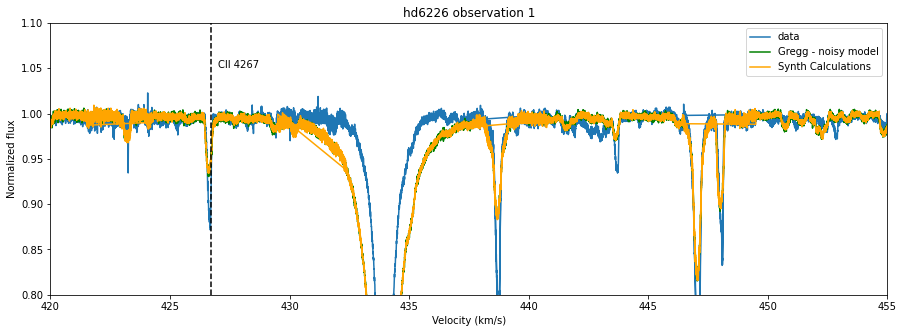

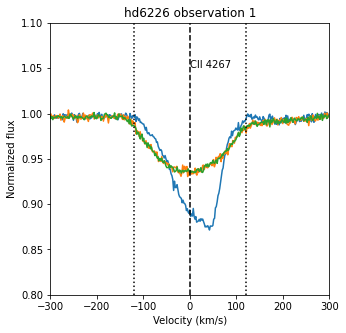

In [ ]:
CII = 426.726 *u.nm
import astropy.units as u
import astropy.constants as const

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI, label='data')
ax.plot(model.wl, model.specI, c='green', label='Gregg - noisy model')
ax.plot(synth.wl, synth.specI, c='orange', label='Synth Calculations')
ax.set_xlim(420,455)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))
ax.legend(loc=0)

fig, ax = plt.subplots(1,1, figsize=(5,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, data.specI)

vel = ((model.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, model.specI)

vel = ((synth.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, synth.specI)

ax.set_xlim(-300,300)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=0, c='k', ls='--')
ax.axvline(x=vsini, c='k', ls='dotted')
ax.axvline(x=-1*vsini, c='k', ls='dotted')
ax.text(0, 1.05, 'CII 4267')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

### 2.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. **Only use the first observation for each star.** 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

In [ ]:
# Code by Dax Moraes and Marisol Catalan Olais

with PdfPages('NormalizedSpectra_CII_DataVSsynth') as pdf:

  for j, StarInfo in StarData.iterrows():
    AdoptVsini = StarInfo["Adopted-vsini"]
    StarName = StarInfo["Name"]
    ObsInfo = Observations.loc[Observations["NameAsif"] == StarName + '_1']
    for i, row in ObsInfo.iterrows():
        Vrad = float(row["vradCorrected"]) * u.km/u.s
  
    file = 'NormalizedSpectra/{}_1.s'.format(StarName)
    data = pol.iolsd.read_spectrum(file)

    ## file = 'RanNoise/{}_1_ran_noise'.format(StarName)
    ## model = pol.iolsd.read_spectrum(file)

    file = 'Synth-hybrid-spectra/{}_1_noise.s'.format(StarName)
    synth = pol.iolsd.read_spectrum(file)

    CII = 426.726 *u.nm
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))
    fig.tight_layout()
    ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=2, rowspan = 1)
    ax2 = plt.subplot2grid((2, 3), (1, 0))
    
    plt.subplots_adjust(left=0.1,
                      bottom=0.2, 
                      right=0.9, 
                      top=0.8, 
                      wspace=0.4, 
                      hspace=0.4)

    ax1.plot(data.wl, data.specI, label='data')
    ax1.plot(synth.wl, synth.specI, c='orange', label='Synth Calculations')
    ax1.set_xlim(420,455)
    ax1.set_ylim(0.8, 1.1)
    ax1.axvline(x=CII.value, c='k', ls='--')
    ax1.text(427, 1.05, 'CII 4267')
    ax1.set_xlabel('Wavelength (nm)') #Changed from "Velocity (km/s)"
    ax1.set_ylabel('Normalized flux')
    ax1.set_title('{} observation 1'.format(StarName))
    ax1.legend(loc=0)

    vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    ax2.plot(vel-Vrad, data.specI)

    vel = ((synth.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    ax2.plot(vel-Vrad, synth.specI)

    ax2.set_xlim(-1.5*AdoptVsini, 1.5*AdoptVsini)
    ax2.set_ylim(0.8, 1.1)
    ax2.axvline(x=0, c='k', ls='--')
    ax2.axvline(x=AdoptVsini, c='k', ls='dotted')
    ax2.axvline(x=-1*AdoptVsini, c='k', ls='dotted')
    ax2.text(0, 1.05, 'CII 4267')
    ax2.set_xlabel('Velocity (km/s)')   #Changed from "Wavelength (nm)"
    ax2.set_ylabel('Normalized flux')
    ax2.set_title('{} observation 1'.format(StarName))
    
    plt.rcParams.update({'figure.max_open_warning': 0})

    pdf.savefig(fig)

Output hidden; open in https://colab.research.google.com to view.

##3. Line Profiles for Hydrogen Alpha Line - Federico

In [ ]:
def read_disk(file):
  '''
  Read a synthetic spectrum from a s3div output

  :param file: The filename
  :rtype: wave, flux -- the wavelength in nm, and the normalized flux. 
  '''
  with open(file) as f:
    lines = f.readlines()
  # number of atomic lines in the header of the file
  natomic = int(lines[0].split(sep='-')[0])
  nwave=int(lines[natomic+1].split()[0])
  data = np.genfromtxt(lines[natomic+2:natomic+1+nwave])
  return(data[:,0]/10.0, data[:,1])

def split_order(data):
  '''
  Split an observation object into a list of observation objects with one order per item
  '''
  # one order is where the wavelength backtracks. 
  ind = np.where((data.wl[1:]-data.wl[0:-1]) < 0)[0]
  norder = ind.size+1
  ind = np.append(-1,ind)
  ind = np.append(ind,data.wl.size)
  print('{} orders'.format(norder))

  list_order=[]
  for i in range(0,norder):
    list_order.append(data[ind[i]+1:ind[i+1]])
 
  return(list_order)
  
def splice_order(list_order):
  '''
  Concatenate a list of observation objects (usually split into a list of orders by split_order function). Note: it does not merge the orders overlaps.
  '''
  wl = np.array([])
  specI = np.array([])
  specV = np.array([])
  specN1 = np.array([])
  specN2 = np.array([])
  specSig = np.array([])
  for item in list_order:
    wl=np.append(wl,item.wl)
    specI=np.append(specI,item.specI)
    specV=np.append(specV,item.specV)
    specN1=np.append(specN1,item.specN1)
    specN2=np.append(specN2,item.specN2)
    specSig=np.append(specSig, item.specSig)
  return(pol.iolsd.observation(wl, specI, specV, specN1, specN2, specSig, header=list_order[0].header))

def rshift(wave, radvel):
  '''
  Shift a spectrum in terms of radial velocity. The wavelength array and the velocity arrays must be defied as astropy units quantities.
  The new wavelength array is returned in the same units as the initial wavelength array. 
  '''
  return( (wave + wave*radvel/const.c).to(wave.unit).value )

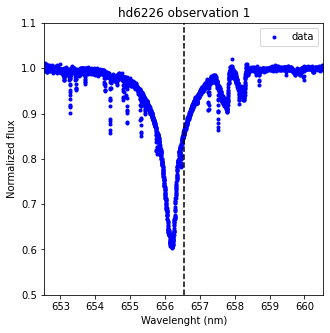

In [ ]:
%cd /content/drive/Shareddrives/BeStarsMiMeS
with PdfPages('HydrogenAlphaSpectralLine.pdf') as pdf:

  for j in range(0,len(Observations["Name"])):
    StarName = Observations["Name"][j]
    Star_Obs = Observations["NameAsif"][j]
    ObsOrder = Observations["ObsOrder"][j]

    if ObsOrder > 1:
      continue
    else:

      index=[j]
      i=1
      if j != 200:
        
        while Observations["ObsOrder"][j+i] > 1:
          index.append(j+i)
          i=i+1

      Loc_vsini = StarData.loc[StarData["Name"] == StarName]
      AdoptVsini = float(Loc_vsini["Adopted-vsini"])
    
      fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))
      fig.tight_layout()
      HydrogenAlpha = 656.3 * u.nm

      ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2, rowspan = 1)
      ax2 = plt.subplot2grid((2, 3), (1, 0))

      plt.subplots_adjust(left=0.1,
                        bottom=0.2, 
                        right=0.9, 
                        top=0.8, 
                        wspace=0.4, 
                        hspace=0.4)
    
      ax1.axvline(x = HydrogenAlpha.value, c ='k', ls = '--')
      ax1.set_xlabel('Wavelength (nm')
      ax1.set_ylabel('Normalized flux')
      ax1.set_title('Star {}'.format(StarName))

      ax2.axvline(x = 0, c ='k', ls ='--')
      ax2.axvline(x = AdoptVsini, c ='k', ls='dotted') 
      ax2.axvline(x=-1*AdoptVsini, c='k', ls='dotted') 
      ax2.text(0, 1.05, 'Hydrogen Alpha')   #Change name
      ax2.set_xlabel('Velocity (km/s)')
      ax2.set_ylabel('Normalized flux')
      ax2.set_title('Star {}'.format(StarName))

      max = 1
      min = 1
      for k in index:
        ObsInfo = Observations.loc[Observations["Name"] == StarName]
        Vrad = float(Observations["vradCorrected"][k])

      

        file = 'NormalizedSpectra/{}_{}.s'.format(StarName, Observations["ObsOrder"][k])
        data = pol.iolsd.read_spectrum(file)
      

        apr_index = np.where(np.round(data.wl - HydrogenAlpha.value,2)==0)[0][0]

        l=1000

        wl = data.wl[apr_index - l:apr_index + l]
        fl = data.specI[apr_index - l:apr_index + l]
        
        L1 = np.max(fl)
        L2 = np.min(fl)
        if L1 > max:
            max = L1
        if L2 < min:
            min = L2
       
        lim = (min -0.1, max + 0.1) 
            
        ax1.scatter(wl, fl,s=0.2,label='Obs{}'.format(Observations["ObsOrder"][k]))
        ax1.set_ylim(lim)
      
      

        vel = ((data.wl*u.nm - HydrogenAlpha)/HydrogenAlpha * const.c).to(u.km/u.s)
        ax2.scatter(vel.value - Vrad, data.specI,s=0.2) 
        ax2.set_xlim(-1.5*AdoptVsini, 1.5*AdoptVsini)
        ax2.set_ylim(lim)
    
    
        #plt.rcParams.update({'figure.max_open_warning': 0})   

      ax1.legend()
      pdf.savefig(fig)

#~5min


